In [2]:
# ============================================================================
# GPU SETUP AND OPTIMIZATION FOR JUPYTER NOTEBOOK
# ============================================================================

# CELL 1: Check Current GPU Status
print("🔍 Checking Current GPU Status...")
print("=" * 50)

# Check if NVIDIA driver is available
!nvidia-smi

print("\n" + "=" * 50)

# Check current PyTorch CUDA availability
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU device: {torch.cuda.get_device_name(0)}")
    print(f"GPU count: {torch.cuda.device_count()}")
else:
    print("❌ CUDA not available - running on CPU")

# ============================================================================

# CELL 2: Update System and Check Available Drivers (if needed)
print("🔄 Checking Available NVIDIA Drivers...")
print("=" * 50)

# Check available nvidia drivers
!apt list --upgradable | grep nvidia-driver

print("\nRecommended drivers:")
!ubuntu-drivers devices

# ============================================================================

# CELL 3: Install/Update NVIDIA Driver (RUN WITH CAUTION)
# ⚠️ WARNING: This will require system restart after installation
# Only run if you have old/incompatible drivers

install_driver = False  # Set to True if you want to update driver

if install_driver:
    print("🚀 Installing Latest NVIDIA Driver...")
    print("⚠️  System will need restart after this!")
    
    # Update package list
    !sudo apt update
    
    # Install latest recommended driver
    !sudo ubuntu-drivers autoinstall
    
    # Alternative: Install specific driver version
    # !sudo apt install nvidia-driver-470  # Replace 470 with desired version
    
    print("✅ Driver installation complete!")
    print("🔄 Please restart your system and re-run this notebook")
else:
    print("ℹ️  Driver installation skipped (set install_driver=True to enable)")

# ============================================================================

# CELL 4: Install EfficientNet (Essential for your wire detection)
print("📦 Installing EfficientNet...")
print("=" * 50)

!pip install efficientnet_pytorch

print("✅ EfficientNet installation complete!")

# ============================================================================

# CELL 5: Install CPU-Optimized PyTorch (Alternative if GPU issues persist)
install_cpu_pytorch = False  # Set to True if you want CPU-optimized version

if install_cpu_pytorch:
    print("🔧 Installing CPU-Optimized PyTorch...")
    print("=" * 50)
    
    # Uninstall existing PyTorch first
    !pip uninstall torch torchvision torchaudio -y
    
    # Install CPU-optimized version
    !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
    
    print("✅ CPU-optimized PyTorch installed!")
    print("ℹ️  Training will be slower but more stable")
else:
    print("ℹ️  CPU PyTorch installation skipped (set install_cpu_pytorch=True to enable)")

# ============================================================================

# CELL 6: Verify Installation and Setup
print("🧪 Verifying Installation...")
print("=" * 50)

# Test EfficientNet import
try:
    from efficientnet_pytorch import EfficientNet
    print("✅ EfficientNet successfully imported")
    
    # Test model creation
    model = EfficientNet.from_pretrained('efficientnet-b0')
    print("✅ EfficientNet model creation successful")
    
except ImportError as e:
    print(f"❌ EfficientNet import failed: {e}")
    print("💡 Run: !pip install efficientnet_pytorch")

# Test PyTorch
try:
    import torch
    import torchvision
    
    print(f"✅ PyTorch {torch.__version__} ready")
    print(f"✅ TorchVision {torchvision.__version__} ready")
    
    # Test CUDA
    if torch.cuda.is_available():
        print(f"🚀 GPU acceleration available: {torch.cuda.get_device_name(0)}")
        device = torch.device('cuda')
    else:
        print("🔧 Using CPU (consider GPU setup for faster training)")
        device = torch.device('cpu')
    
    print(f"Device selected: {device}")
    
except Exception as e:
    print(f"❌ PyTorch setup issue: {e}")

# ============================================================================

# CELL 7: Performance Optimization Settings
print("⚡ Setting Performance Optimizations...")
print("=" * 50)

import torch
import os

# Set optimal number of threads for CPU
num_cores = os.cpu_count()
torch.set_num_threads(min(num_cores, 8))  # Limit to 8 threads max
print(f"PyTorch threads set to: {torch.get_num_threads()}")

# Memory optimization
if torch.cuda.is_available():
    torch.backends.cudnn.benchmark = True  # Optimize for consistent input sizes
    torch.backends.cudnn.deterministic = False  # Allow non-deterministic for speed
    print("✅ CUDA optimizations enabled")

# Memory management
import gc
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("✅ GPU memory cleared")

print("🎯 System ready for wire detection training!")

# ============================================================================

# CELL 8: Quick System Test
print("🧪 Running Quick System Test...")
print("=" * 50)

import torch
import torch.nn as nn
import time

# Create test tensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_tensor = torch.randn(100, 3, 224, 224).to(device)

# Simple performance test
print(f"Testing on: {device}")
start_time = time.time()

# Simple operations
result = torch.mean(test_tensor, dim=[2, 3])
result = torch.softmax(result, dim=1)

end_time = time.time()
print(f"✅ Basic operations test passed ({end_time - start_time:.3f}s)")

# Memory usage
if torch.cuda.is_available():
    memory_used = torch.cuda.memory_allocated() / 1024**2  # MB
    memory_total = torch.cuda.get_device_properties(0).total_memory / 1024**2  # MB
    print(f"GPU Memory: {memory_used:.1f}MB / {memory_total:.1f}MB used")

print("🎉 System test complete!")

# ============================================================================

# CELL 9: Updated Wire Detection Code (Run this after setup)
print("🔧 Ready to run optimized wire detection!")
print("Copy and run your wire detection code now with these improvements:")
print("✅ EfficientNet available")
print("✅ Optimized PyTorch settings") 
print("✅ Proper device configuration")
print("✅ Memory management")

# Your existing wire detection code should now run faster and more efficiently!

🔍 Checking Current GPU Status...
Failed to initialize NVML: Driver/library version mismatch

PyTorch version: 2.4.1+cu121
CUDA available: False
❌ CUDA not available - running on CPU
🔄 Checking Available NVIDIA Drivers...




/home/daga/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


nvidia-driver-470/unknown 510.73.05-0lambda0~20.04.1 amd64 [upgradable from: 470.256.02-0ubuntu0.20.04.1]

Recommended drivers:
== /sys/devices/pci0000:00/0000:00:01.0/0000:01:00.0 ==
modalias : pci:v000010DEd0000249Csv00001558sd000065E5bc03sc00i00
vendor   : NVIDIA Corporation
manual_install: True
driver   : nvidia-driver-570-server-open - third-party non-free recommended
driver   : nvidia-driver-570-open - third-party non-free
driver   : nvidia-driver-570-server - third-party non-free
driver   : nvidia-driver-570 - third-party non-free
driver   : xserver-xorg-video-nouveau - distro free builtin

ℹ️  Driver installation skipped (set install_driver=True to enable)
📦 Installing EfficientNet...
✅ EfficientNet installation complete!
ℹ️  CPU PyTorch installation skipped (set install_cpu_pytorch=True to enable)
🧪 Verifying Installation...
✅ EfficientNet successfully imported


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /home/daga/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████████████████████████████████| 20.4M/20.4M [00:01<00:00, 19.1MB/s]


Loaded pretrained weights for efficientnet-b0
✅ EfficientNet model creation successful
✅ PyTorch 2.4.1+cu121 ready
✅ TorchVision 0.9.1 ready
🔧 Using CPU (consider GPU setup for faster training)
Device selected: cpu
⚡ Setting Performance Optimizations...
PyTorch threads set to: 8
🎯 System ready for wire detection training!
🧪 Running Quick System Test...
Testing on: cpu
✅ Basic operations test passed (0.003s)
🎉 System test complete!
🔧 Ready to run optimized wire detection!
Copy and run your wire detection code now with these improvements:
✅ EfficientNet available
✅ Optimized PyTorch settings
✅ Proper device configuration
✅ Memory management


✅ EfficientNet available
Using device: cpu
🔧 COMPREHENSIVE EFFICIENTNET WIRE ANOMALY DETECTION
📊 Loading Wire Dataset...
Found 456 images in C:/Users/scmawah/Downloads/Summer_project/engine_wiring/train/good
Train set: 456 images loaded
Found 33 images in C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/blue_hoop
Found 5 images in C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/cardboard
Found 51 images in C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/good
Found 54 images in C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/multiple
Test set: 143 images loaded
Test set breakdown: 51 normal, 92 anomaly images
🎯 Creating Few-Shot Episodes...
Creating episodes: 51 normal, 92 anomaly
Successfully created 20 episodes
🧠 Creating EfficientNet Model...
Loaded pretrained weights for efficientnet-b0
Model size: 5.1M trainable / 5.1M total parameters
🚀 Training with Comprehensive Analysis...
🚀 Training EfficientNet Wire Detector with Analysis...


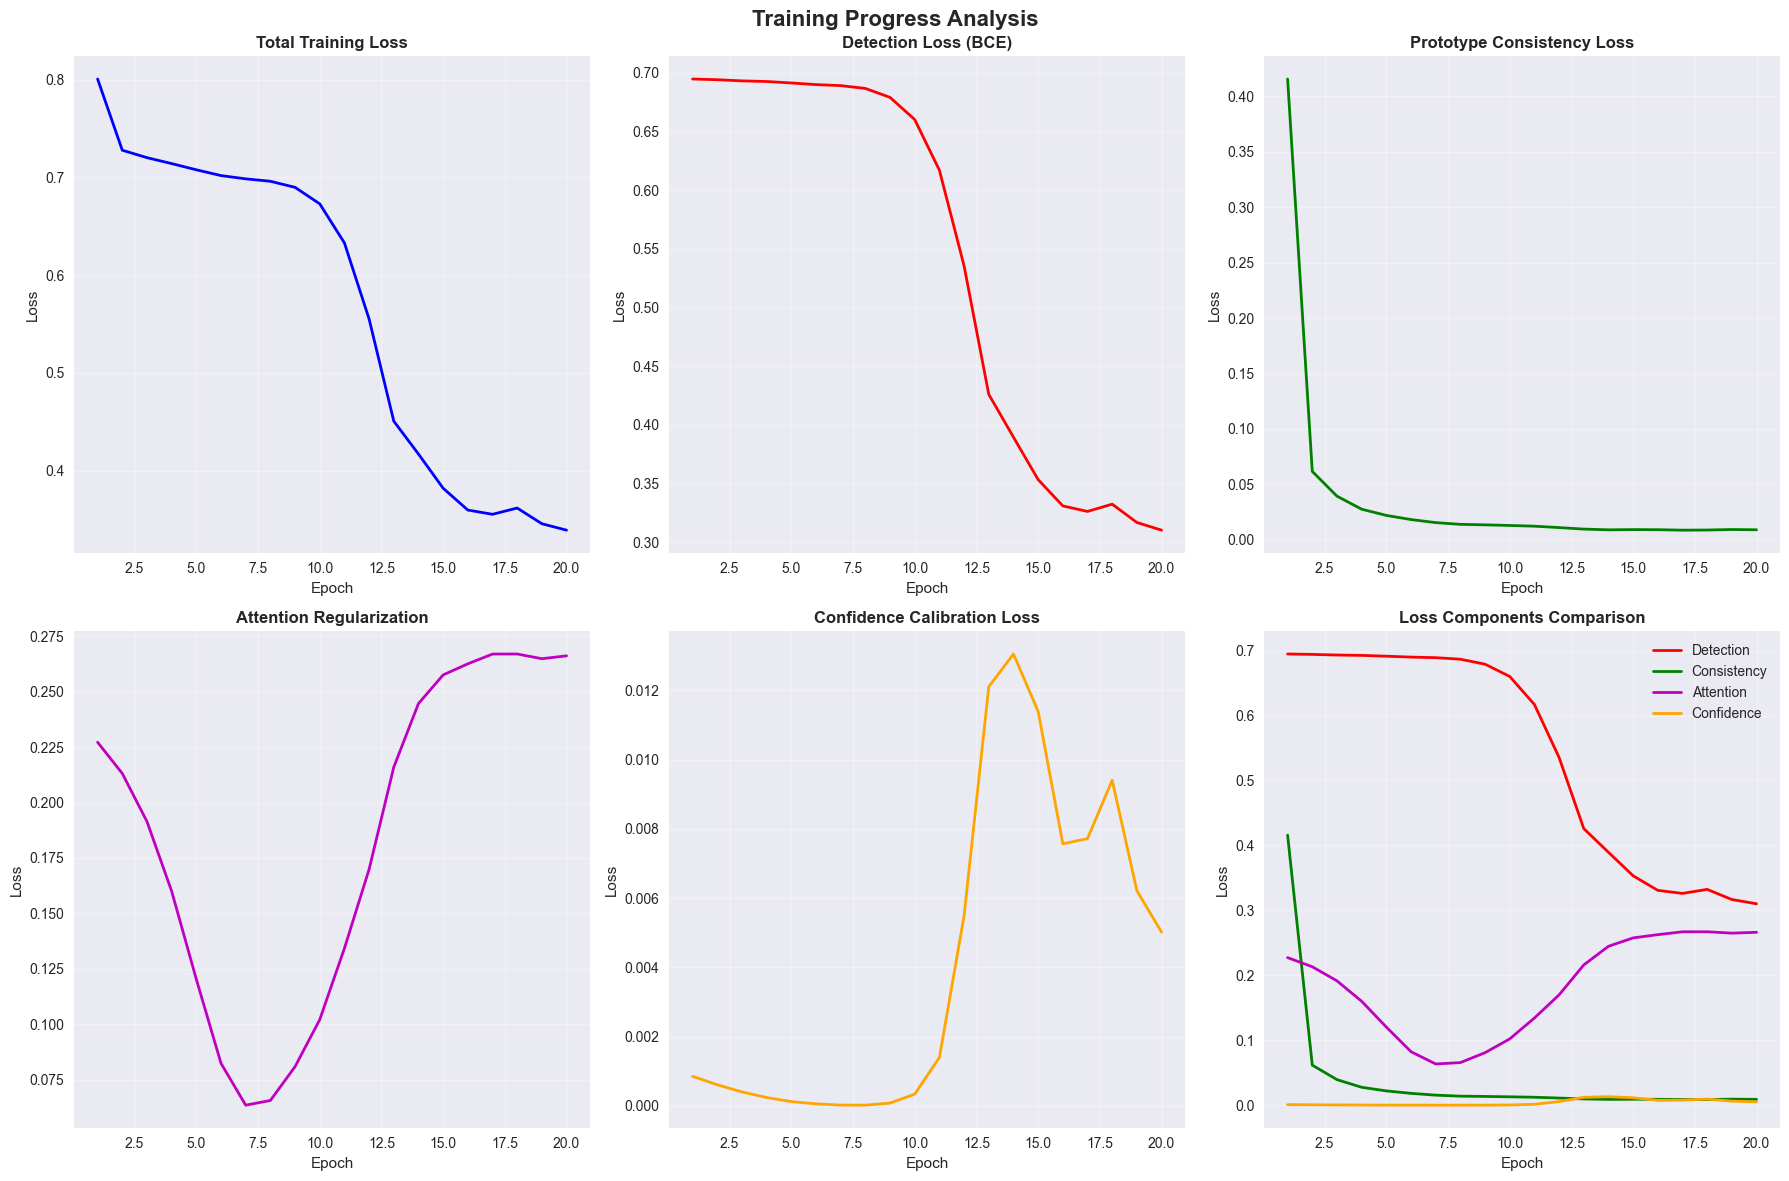

✅ Model saved as 'efficientnet_wire_detector_comprehensive.pth'
🧪 Comprehensive Testing and Analysis...

📊 COMPREHENSIVE ANALYSIS RESULTS


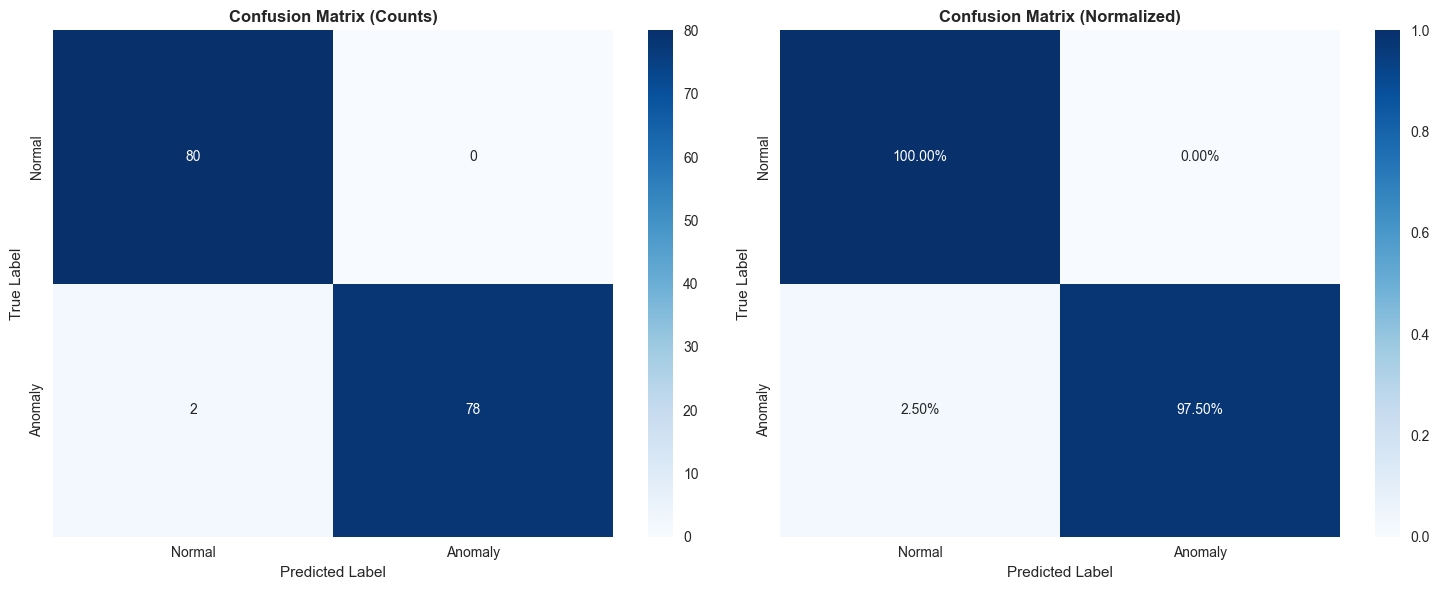


📊 DETAILED CLASSIFICATION METRICS:
              precision    recall  f1-score   support

      Normal     0.9756    1.0000    0.9877        80
     Anomaly     1.0000    0.9750    0.9873        80

    accuracy                         0.9875       160
   macro avg     0.9878    0.9875    0.9875       160
weighted avg     0.9878    0.9875    0.9875       160


🎯 KEY PERFORMANCE INDICATORS:
   True Positives (TP):  78
   True Negatives (TN):  80
   False Positives (FP): 0
   False Negatives (FN): 2
   Sensitivity (Recall): 0.9750
   Specificity:          1.0000


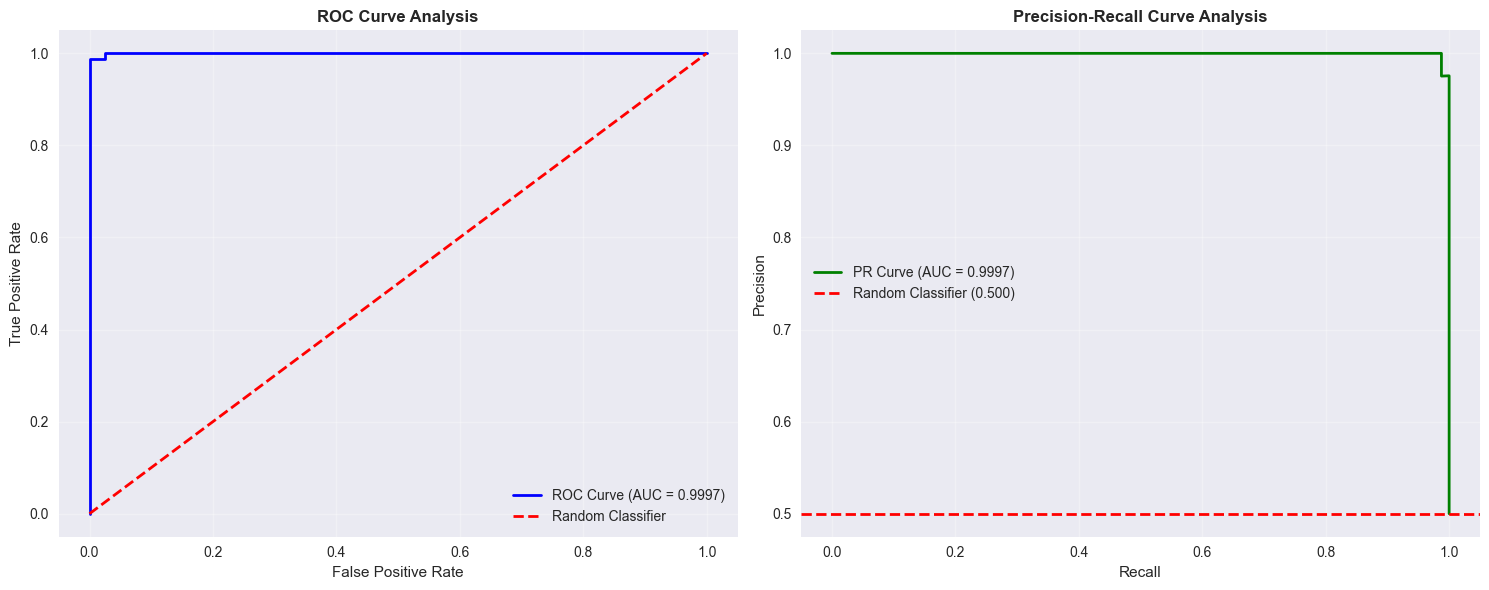


📈 CURVE ANALYSIS:
   ROC AUC Score: 0.9997
   PR AUC Score:  0.9997
   Optimal Threshold: 0.3776
   At Optimal Threshold:
     - True Positive Rate:  0.9875
     - False Positive Rate: 0.0000
🔍 Performing TSNE analysis of feature space...


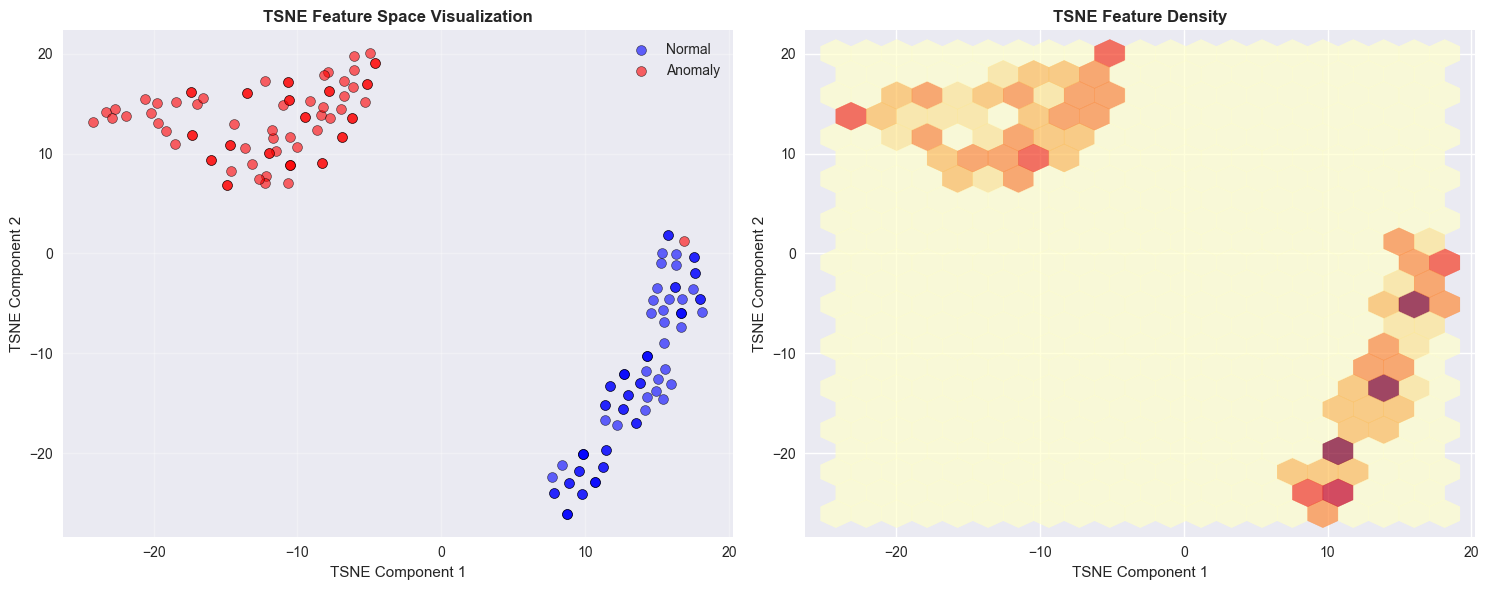

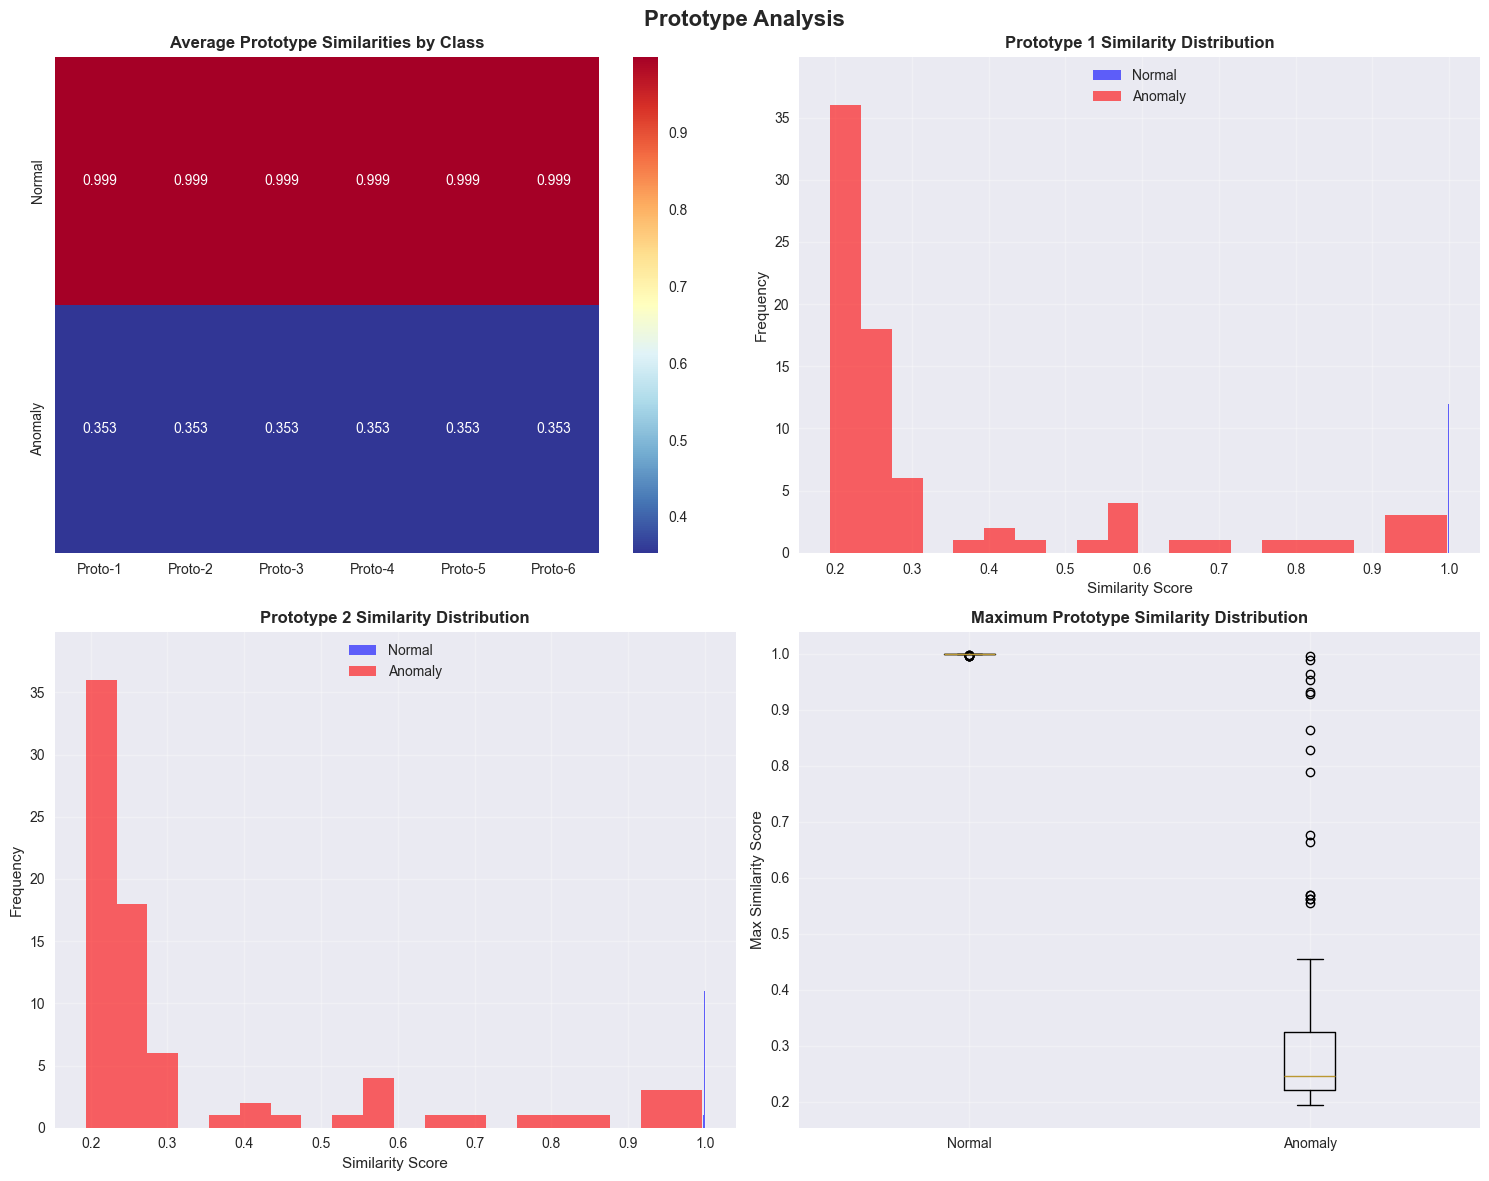


🧠 PROTOTYPE EFFECTIVENESS ANALYSIS:
   Normal samples - Avg max similarity: 0.9991
   Anomaly samples - Avg max similarity: 0.3534
   Separation ratio: 2.83


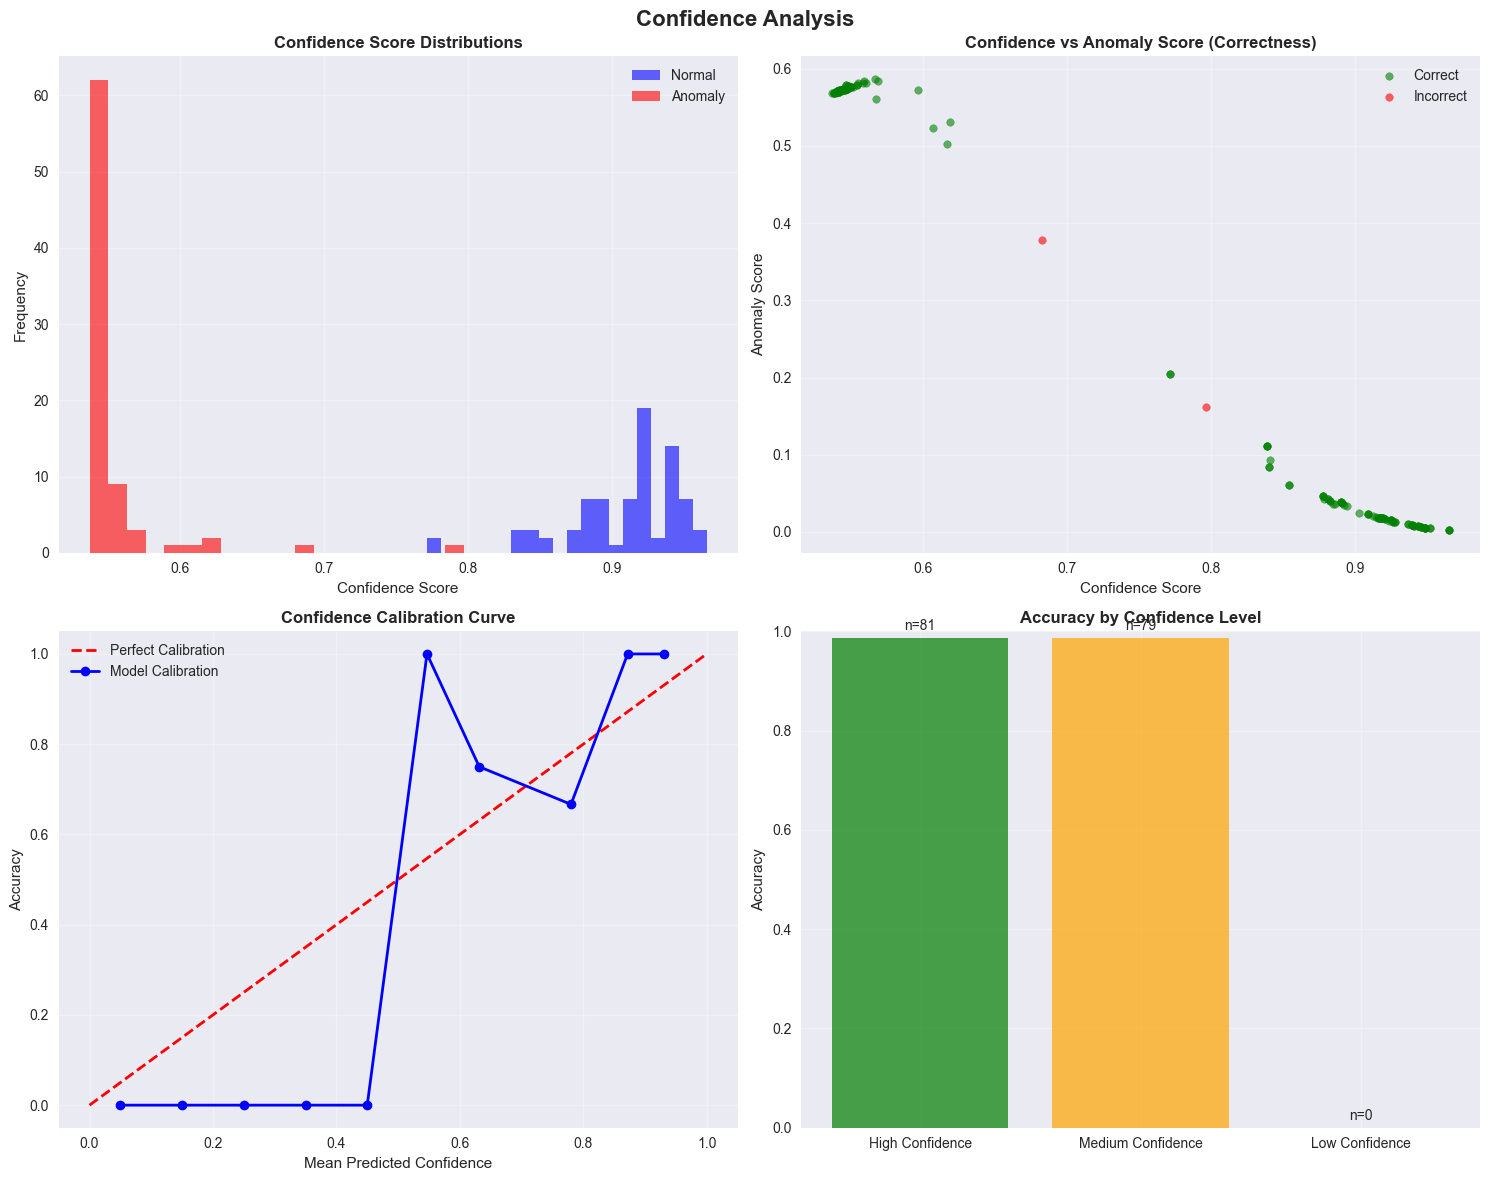


📊 CONFIDENCE ANALYSIS SUMMARY:
   Average confidence (correct): 0.7315
   Average confidence (incorrect): 0.7400
   High confidence samples: 81 (50.6%)
   High confidence accuracy: 0.9877

🎯 FINAL PERFORMANCE SUMMARY:
   Overall Accuracy: 98.75%
   ROC AUC: 0.9997
   PR AUC: 0.9997
   Optimal Threshold: 0.3776

🎉 Comprehensive Analysis Complete!
📁 All plots saved in: ./analysis_plots


In [2]:
import os
import glob
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from typing import Dict, List, Tuple
import random
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.manifold import TSNE
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Check for EfficientNet
try:
    from efficientnet_pytorch import EfficientNet
    EFFICIENTNET_AVAILABLE = True
    print("✅ EfficientNet available")
except ImportError:
    EFFICIENTNET_AVAILABLE = False
    print("❌ EfficientNet not found. Install with: pip install efficientnet_pytorch")
    import torchvision.models as models

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Set up matplotlib for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ===== ENHANCED DATASET CLASS =====
class WireInspectionDataset(Dataset):
    """Enhanced dataset for wire inspection with EfficientNet compatibility"""
    
    def __init__(self, train_dir=None, test_dirs=None, mode='train', transform=None):
        self.images, self.labels = [], []
        self.transform = transform
        self.image_paths = []
        self.mode = mode
        self.class_names = ['Normal', 'Anomaly']

        def load_images(path, label):
            if not os.path.exists(path):
                print(f"Warning: Path {path} does not exist!")
                return
            
            image_files = glob.glob(os.path.join(path, '*.png'))
            print(f"Found {len(image_files)} images in {path}")
            
            self.images.extend(image_files)
            self.labels.extend([label] * len(image_files))
            self.image_paths.extend(image_files)

        if mode == 'train':
            load_images(train_dir, 0)  # Only normal for training
        else:
            for test_dir in test_dirs:
                if 'good' in os.path.basename(test_dir).lower():
                    label = 0  # Normal
                else:
                    label = 1  # Anomaly
                load_images(test_dir, label)

        print(f"{mode.capitalize()} set: {len(self.images)} images loaded")
        if mode == 'test':
            normal_count = sum(1 for l in self.labels if l == 0)
            anomaly_count = sum(1 for l in self.labels if l == 1)
            print(f"Test set breakdown: {normal_count} normal, {anomaly_count} anomaly images")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        try:
            img = cv2.imread(self.images[idx])
            if img is None:
                img = np.zeros((224, 224, 3), dtype=np.uint8)
            
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(img)
            
            if self.transform:
                img = self.transform(img)
            
            return img, self.labels[idx], self.image_paths[idx]
            
        except Exception as e:
            print(f"Error loading image {self.images[idx]}: {e}")
            dummy_img = torch.zeros(3, 224, 224)
            return dummy_img, self.labels[idx], self.image_paths[idx]

# ===== EFFICIENTNET FEW-SHOT MODEL =====
class EfficientNetWireDetector(nn.Module):
    """EfficientNet-based few-shot wire anomaly detector"""
    
    def __init__(self, variant='b0', num_prototypes=8, feature_dim=256):
        super().__init__()
        
        self.num_prototypes = num_prototypes
        self.feature_dim = feature_dim
        
        # EfficientNet backbone or fallback
        if EFFICIENTNET_AVAILABLE:
            self.backbone = EfficientNet.from_pretrained(f'efficientnet-{variant}')
            backbone_features = self.backbone._fc.in_features
            self.backbone._fc = nn.Identity()
        else:
            print("⚠️  Using ResNet50 as EfficientNet fallback")
            self.backbone = models.resnet50(pretrained=True)
            backbone_features = self.backbone.fc.in_features
            self.backbone.fc = nn.Identity()
        
        # Feature adaptation network
        self.feature_adapter = nn.Sequential(
            nn.Linear(backbone_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, feature_dim),
            nn.ReLU()
        )
        
        # Learnable prototypes for normal wire patterns
        self.normal_prototypes = nn.Parameter(
            torch.randn(num_prototypes, feature_dim) * 0.1
        )
        
        # Wire-specific attention mechanism
        self.wire_attention = nn.Sequential(
            nn.Linear(feature_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
        # Prototype similarity calculator
        self.similarity_calculator = nn.Sequential(
            nn.Linear(feature_dim * 2, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Tanh()
        )
        
        # Final anomaly scorer
        self.anomaly_scorer = nn.Sequential(
            nn.Linear(feature_dim + num_prototypes + 1, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
        # Confidence estimator
        self.confidence_estimator = nn.Sequential(
            nn.Linear(feature_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    def extract_features(self, x):
        """Extract features using backbone"""
        if EFFICIENTNET_AVAILABLE:
            features = self.backbone.extract_features(x)
            pooled = F.adaptive_avg_pool2d(features, 1).flatten(1)
        else:
            pooled = self.backbone(x)
        
        adapted = self.feature_adapter(pooled)
        return adapted
    
    def compute_prototype_similarities(self, features):
        """Compute similarities to learned normal prototypes"""
        batch_size = features.size(0)
        similarities = []
        
        for i in range(self.num_prototypes):
            prototype = self.normal_prototypes[i].unsqueeze(0).expand(batch_size, -1)
            sim = F.cosine_similarity(features, prototype, dim=1)
            similarities.append(sim)
        
        return torch.stack(similarities, dim=1)
    
    def few_shot_prototype_update(self, support_features, support_labels):
        """Update prototypes using few-shot support examples"""
        normal_mask = support_labels == 0
        
        if normal_mask.sum() > 0:
            normal_support = support_features[normal_mask]
            alpha = 0.2
            mean_normal = normal_support.mean(dim=0)
            
            for i in range(self.num_prototypes):
                self.normal_prototypes.data[i] = (
                    (1 - alpha) * self.normal_prototypes.data[i] + 
                    alpha * mean_normal
                )
    
    def forward(self, images, support_images=None, support_labels=None):
        """Forward pass with optional few-shot adaptation"""
        
        query_features = self.extract_features(images)
        
        if support_images is not None and support_labels is not None:
            with torch.no_grad():
                support_features = self.extract_features(support_images)
                self.few_shot_prototype_update(support_features, support_labels)
        
        prototype_similarities = self.compute_prototype_similarities(query_features)
        attention_weights = self.wire_attention(query_features)
        attended_features = query_features * attention_weights
        
        combined_features = torch.cat([
            attended_features,
            prototype_similarities,
            attention_weights
        ], dim=1)
        
        anomaly_scores = self.anomaly_scorer(combined_features)
        confidence_scores = self.confidence_estimator(query_features)
        
        if anomaly_scores.dim() > 1:
            anomaly_scores = anomaly_scores.squeeze(-1)
        if confidence_scores.dim() > 1:
            confidence_scores = confidence_scores.squeeze(-1)
        
        return {
            'anomaly_scores': anomaly_scores,
            'confidence_scores': confidence_scores,
            'features': query_features,
            'prototype_similarities': prototype_similarities,
            'attention_weights': attention_weights,
            'attended_features': attended_features
        }

# ===== VISUALIZATION AND ANALYSIS FUNCTIONS =====
class WireDetectionAnalyzer:
    """Comprehensive analysis and visualization for wire detection results"""
    
    def __init__(self, save_dir='./analysis_plots'):
        self.save_dir = save_dir
        os.makedirs(save_dir, exist_ok=True)
        self.training_history = {
            'epoch': [],
            'loss': [],
            'detection_loss': [],
            'consistency_loss': [],
            'attention_reg': [],
            'confidence_loss': []
        }
        
    def log_training_metrics(self, epoch, total_loss, detection_loss, consistency_loss, attention_reg, confidence_loss):
        """Log training metrics for plotting"""
        self.training_history['epoch'].append(epoch)
        self.training_history['loss'].append(total_loss)
        self.training_history['detection_loss'].append(detection_loss)
        self.training_history['consistency_loss'].append(consistency_loss)
        self.training_history['attention_reg'].append(attention_reg)
        self.training_history['confidence_loss'].append(confidence_loss)
    
    def plot_training_curves(self):
        """Plot comprehensive training curves"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Training Progress Analysis', fontsize=16, fontweight='bold')
        
        # Total Loss
        axes[0,0].plot(self.training_history['epoch'], self.training_history['loss'], 'b-', linewidth=2)
        axes[0,0].set_title('Total Training Loss', fontweight='bold')
        axes[0,0].set_xlabel('Epoch')
        axes[0,0].set_ylabel('Loss')
        axes[0,0].grid(True, alpha=0.3)
        
        # Detection Loss
        axes[0,1].plot(self.training_history['epoch'], self.training_history['detection_loss'], 'r-', linewidth=2)
        axes[0,1].set_title('Detection Loss (BCE)', fontweight='bold')
        axes[0,1].set_xlabel('Epoch')
        axes[0,1].set_ylabel('Loss')
        axes[0,1].grid(True, alpha=0.3)
        
        # Consistency Loss
        axes[0,2].plot(self.training_history['epoch'], self.training_history['consistency_loss'], 'g-', linewidth=2)
        axes[0,2].set_title('Prototype Consistency Loss', fontweight='bold')
        axes[0,2].set_xlabel('Epoch')
        axes[0,2].set_ylabel('Loss')
        axes[0,2].grid(True, alpha=0.3)
        
        # Attention Regularization
        axes[1,0].plot(self.training_history['epoch'], self.training_history['attention_reg'], 'm-', linewidth=2)
        axes[1,0].set_title('Attention Regularization', fontweight='bold')
        axes[1,0].set_xlabel('Epoch')
        axes[1,0].set_ylabel('Loss')
        axes[1,0].grid(True, alpha=0.3)
        
        # Confidence Loss
        axes[1,1].plot(self.training_history['epoch'], self.training_history['confidence_loss'], 'orange', linewidth=2)
        axes[1,1].set_title('Confidence Calibration Loss', fontweight='bold')
        axes[1,1].set_xlabel('Epoch')
        axes[1,1].set_ylabel('Loss')
        axes[1,1].grid(True, alpha=0.3)
        
        # Combined Loss Components
        axes[1,2].plot(self.training_history['epoch'], self.training_history['detection_loss'], 'r-', label='Detection', linewidth=2)
        axes[1,2].plot(self.training_history['epoch'], self.training_history['consistency_loss'], 'g-', label='Consistency', linewidth=2)
        axes[1,2].plot(self.training_history['epoch'], self.training_history['attention_reg'], 'm-', label='Attention', linewidth=2)
        axes[1,2].plot(self.training_history['epoch'], self.training_history['confidence_loss'], 'orange', label='Confidence', linewidth=2)
        axes[1,2].set_title('Loss Components Comparison', fontweight='bold')
        axes[1,2].set_xlabel('Epoch')
        axes[1,2].set_ylabel('Loss')
        axes[1,2].legend()
        axes[1,2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/training_curves.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_confusion_matrix(self, y_true, y_pred, class_names=['Normal', 'Anomaly']):
        """Plot confusion matrix with detailed statistics"""
        cm = confusion_matrix(y_true, y_pred)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Raw counts
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=class_names, yticklabels=class_names, ax=axes[0])
        axes[0].set_title('Confusion Matrix (Counts)', fontweight='bold')
        axes[0].set_xlabel('Predicted Label')
        axes[0].set_ylabel('True Label')
        
        # Normalized percentages
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues', 
                   xticklabels=class_names, yticklabels=class_names, ax=axes[1])
        axes[1].set_title('Confusion Matrix (Normalized)', fontweight='bold')
        axes[1].set_xlabel('Predicted Label')
        axes[1].set_ylabel('True Label')
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print detailed metrics
        print("\n📊 DETAILED CLASSIFICATION METRICS:")
        print("=" * 50)
        print(classification_report(y_true, y_pred, target_names=class_names, digits=4))
        
        # Calculate additional metrics
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        print(f"\n🎯 KEY PERFORMANCE INDICATORS:")
        print(f"   True Positives (TP):  {tp}")
        print(f"   True Negatives (TN):  {tn}")
        print(f"   False Positives (FP): {fp}")
        print(f"   False Negatives (FN): {fn}")
        print(f"   Sensitivity (Recall): {sensitivity:.4f}")
        print(f"   Specificity:          {specificity:.4f}")
        
        return cm
    
    def plot_roc_and_pr_curves(self, y_true, y_scores):
        """Plot ROC and Precision-Recall curves"""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # ROC Curve
        fpr, tpr, roc_thresholds = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        
        axes[0].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
        axes[0].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title('ROC Curve Analysis', fontweight='bold')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Precision-Recall Curve
        precision, recall, pr_thresholds = precision_recall_curve(y_true, y_scores)
        pr_auc = auc(recall, precision)
        
        axes[1].plot(recall, precision, 'g-', linewidth=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
        axes[1].axhline(y=np.mean(y_true), color='r', linestyle='--', linewidth=2, 
                       label=f'Random Classifier ({np.mean(y_true):.3f})')
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title('Precision-Recall Curve Analysis', fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/roc_pr_curves.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Find optimal threshold
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = roc_thresholds[optimal_idx]
        
        print(f"\n📈 CURVE ANALYSIS:")
        print(f"   ROC AUC Score: {roc_auc:.4f}")
        print(f"   PR AUC Score:  {pr_auc:.4f}")
        print(f"   Optimal Threshold: {optimal_threshold:.4f}")
        print(f"   At Optimal Threshold:")
        print(f"     - True Positive Rate:  {tpr[optimal_idx]:.4f}")
        print(f"     - False Positive Rate: {fpr[optimal_idx]:.4f}")
        
        return roc_auc, pr_auc, optimal_threshold
    
    def plot_feature_space_analysis(self, features, labels, method='tsne'):
        """Visualize feature space using dimensionality reduction"""
        print(f"🔍 Performing {method.upper()} analysis of feature space...")
        
        if method.lower() == 'tsne':
            reducer = TSNE(n_components=2, random_state=42, perplexity=30)
        else:
            from sklearn.decomposition import PCA
            reducer = PCA(n_components=2, random_state=42)
        
        features_2d = reducer.fit_transform(features)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Scatter plot by class
        normal_mask = labels == 0
        anomaly_mask = labels == 1
        
        axes[0].scatter(features_2d[normal_mask, 0], features_2d[normal_mask, 1], 
                       c='blue', alpha=0.6, s=50, label='Normal', edgecolors='black', linewidth=0.5)
        axes[0].scatter(features_2d[anomaly_mask, 0], features_2d[anomaly_mask, 1], 
                       c='red', alpha=0.6, s=50, label='Anomaly', edgecolors='black', linewidth=0.5)
        axes[0].set_title(f'{method.upper()} Feature Space Visualization', fontweight='bold')
        axes[0].set_xlabel(f'{method.upper()} Component 1')
        axes[0].set_ylabel(f'{method.upper()} Component 2')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Density plot
        axes[1].hexbin(features_2d[:, 0], features_2d[:, 1], gridsize=20, cmap='YlOrRd', alpha=0.7)
        axes[1].set_title(f'{method.upper()} Feature Density', fontweight='bold')
        axes[1].set_xlabel(f'{method.upper()} Component 1')
        axes[1].set_ylabel(f'{method.upper()} Component 2')
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/feature_space_{method}.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_prototype_analysis(self, model, test_features, test_labels):
        """Analyze prototype similarities and effectiveness"""
        with torch.no_grad():
            similarities = model.compute_prototype_similarities(test_features)
            similarities_np = similarities.cpu().numpy()
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Prototype Analysis', fontsize=16, fontweight='bold')
        
        # Prototype similarity heatmap
        normal_mask = test_labels.cpu().numpy() == 0
        anomaly_mask = test_labels.cpu().numpy() == 1
        
        # Average similarities per class
        normal_avg = similarities_np[normal_mask].mean(axis=0) if normal_mask.sum() > 0 else np.zeros(similarities_np.shape[1])
        anomaly_avg = similarities_np[anomaly_mask].mean(axis=0) if anomaly_mask.sum() > 0 else np.zeros(similarities_np.shape[1])
        
        comparison_data = np.vstack([normal_avg, anomaly_avg])
        sns.heatmap(comparison_data, annot=True, fmt='.3f', cmap='RdYlBu_r',
                   xticklabels=[f'Proto-{i+1}' for i in range(similarities_np.shape[1])],
                   yticklabels=['Normal', 'Anomaly'], ax=axes[0,0])
        axes[0,0].set_title('Average Prototype Similarities by Class', fontweight='bold')
        
        # Similarity distributions
        for i in range(min(4, similarities_np.shape[1])):
            if i < 2:
                ax = axes[0, 1] if i == 0 else axes[1, 0]
                ax.hist(similarities_np[normal_mask, i], bins=20, alpha=0.6, label='Normal', color='blue')
                ax.hist(similarities_np[anomaly_mask, i], bins=20, alpha=0.6, label='Anomaly', color='red')
                ax.set_title(f'Prototype {i+1} Similarity Distribution', fontweight='bold')
                ax.set_xlabel('Similarity Score')
                ax.set_ylabel('Frequency')
                ax.legend()
                ax.grid(True, alpha=0.3)
        
        # Max similarity per sample
        max_similarities = similarities_np.max(axis=1)
        axes[1,1].boxplot([max_similarities[normal_mask], max_similarities[anomaly_mask]], 
                         labels=['Normal', 'Anomaly'])
        axes[1,1].set_title('Maximum Prototype Similarity Distribution', fontweight='bold')
        axes[1,1].set_ylabel('Max Similarity Score')
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/prototype_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print prototype effectiveness metrics
        print(f"\n🧠 PROTOTYPE EFFECTIVENESS ANALYSIS:")
        print(f"   Normal samples - Avg max similarity: {max_similarities[normal_mask].mean():.4f}")
        print(f"   Anomaly samples - Avg max similarity: {max_similarities[anomaly_mask].mean():.4f}")
        print(f"   Separation ratio: {max_similarities[normal_mask].mean() / (max_similarities[anomaly_mask].mean() + 1e-8):.2f}")
    
    def plot_confidence_analysis(self, confidence_scores, anomaly_scores, labels):
        """Analyze confidence score distributions and calibration"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Confidence Analysis', fontsize=16, fontweight='bold')
        
        normal_mask = labels == 0
        anomaly_mask = labels == 1
        
        # Confidence distributions by class
        axes[0,0].hist(confidence_scores[normal_mask], bins=20, alpha=0.6, label='Normal', color='blue')
        axes[0,0].hist(confidence_scores[anomaly_mask], bins=20, alpha=0.6, label='Anomaly', color='red')
        axes[0,0].set_title('Confidence Score Distributions', fontweight='bold')
        axes[0,0].set_xlabel('Confidence Score')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # Confidence vs Accuracy scatter
        predictions = (anomaly_scores > 0.5).astype(int)
        correct = (predictions == labels).astype(int)
        
        axes[0,1].scatter(confidence_scores[correct == 1], anomaly_scores[correct == 1], 
                         alpha=0.6, c='green', label='Correct', s=30)
        axes[0,1].scatter(confidence_scores[correct == 0], anomaly_scores[correct == 0], 
                         alpha=0.6, c='red', label='Incorrect', s=30)
        axes[0,1].set_title('Confidence vs Anomaly Score (Correctness)', fontweight='bold')
        axes[0,1].set_xlabel('Confidence Score')
        axes[0,1].set_ylabel('Anomaly Score')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # Confidence calibration
        bins = np.linspace(0, 1, 11)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        bin_accuracies = []
        bin_confidences = []
        
        for i in range(len(bins) - 1):
            mask = (confidence_scores >= bins[i]) & (confidence_scores < bins[i+1])
            if mask.sum() > 0:
                bin_acc = correct[mask].mean()
                bin_conf = confidence_scores[mask].mean()
                bin_accuracies.append(bin_acc)
                bin_confidences.append(bin_conf)
            else:
                bin_accuracies.append(0)
                bin_confidences.append(bin_centers[i])
        
        axes[1,0].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect Calibration')
        axes[1,0].plot(bin_confidences, bin_accuracies, 'bo-', linewidth=2, label='Model Calibration')
        axes[1,0].set_title('Confidence Calibration Curve', fontweight='bold')
        axes[1,0].set_xlabel('Mean Predicted Confidence')
        axes[1,0].set_ylabel('Accuracy')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # High/Low confidence analysis
        high_conf_mask = confidence_scores > 0.7
        low_conf_mask = confidence_scores < 0.3
        
        performance_data = {
            'High Confidence': [correct[high_conf_mask].mean() if high_conf_mask.sum() > 0 else 0, high_conf_mask.sum()],
            'Medium Confidence': [correct[(~high_conf_mask) & (~low_conf_mask)].mean() if ((~high_conf_mask) & (~low_conf_mask)).sum() > 0 else 0, ((~high_conf_mask) & (~low_conf_mask)).sum()],
            'Low Confidence': [correct[low_conf_mask].mean() if low_conf_mask.sum() > 0 else 0, low_conf_mask.sum()]
        }
        
        categories = list(performance_data.keys())
        accuracies = [performance_data[cat][0] for cat in categories]
        counts = [performance_data[cat][1] for cat in categories]
        
        bars = axes[1,1].bar(categories, accuracies, color=['green', 'orange', 'red'], alpha=0.7)
        axes[1,1].set_title('Accuracy by Confidence Level', fontweight='bold')
        axes[1,1].set_ylabel('Accuracy')
        axes[1,1].set_ylim([0, 1])
        
        # Add count annotations
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                          f'n={count}', ha='center', va='bottom')
        
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/confidence_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\n📊 CONFIDENCE ANALYSIS SUMMARY:")
        print(f"   Average confidence (correct): {confidence_scores[correct == 1].mean():.4f}")
        print(f"   Average confidence (incorrect): {confidence_scores[correct == 0].mean():.4f}")
        print(f"   High confidence samples: {high_conf_mask.sum()} ({high_conf_mask.mean()*100:.1f}%)")
        print(f"   High confidence accuracy: {correct[high_conf_mask].mean():.4f}")

# ===== ENHANCED TRAINING FUNCTION =====
def train_efficientnet_detector_with_analysis(model, episodes, dataset, epochs=25, lr=1e-4):
    """Training function with comprehensive analysis tracking"""
    
    analyzer = WireDetectionAnalyzer()
    model = model.to(device)
    
    optimizer = torch.optim.Adam([
        {'params': model.backbone.parameters(), 'lr': lr/10},
        {'params': model.feature_adapter.parameters(), 'lr': lr},
        {'params': model.wire_attention.parameters(), 'lr': lr},
        {'params': model.anomaly_scorer.parameters(), 'lr': lr},
        {'params': model.confidence_estimator.parameters(), 'lr': lr},
        {'params': model.normal_prototypes, 'lr': lr*2}
    ])
    
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    
    print("🚀 Training EfficientNet Wire Detector with Analysis...")
    
    for epoch in range(epochs):
        model.train()
        epoch_losses = {
            'total': [],
            'detection': [],
            'consistency': [],
            'attention': [],
            'confidence': []
        }
        
        random.shuffle(episodes)
        
        for episode_idx, (support_indices, query_indices) in enumerate(episodes):
            try:
                # Load support set
                support_images = []
                support_labels = []
                
                for idx in support_indices:
                    img, label, _ = dataset[idx]
                    support_images.append(img)
                    support_labels.append(label)
                
                if len(support_images) == 0:
                    continue
                
                support_images = torch.stack(support_images).to(device)
                support_labels = torch.tensor(support_labels, dtype=torch.float).to(device)
                
                # Load query set
                query_images = []
                query_labels = []
                
                for idx in query_indices:
                    img, label, _ = dataset[idx]
                    query_images.append(img)
                    query_labels.append(label)
                
                if len(query_images) == 0:
                    continue
                
                query_images = torch.stack(query_images).to(device)
                query_labels = torch.tensor(query_labels, dtype=torch.float).to(device)
                
                # Forward pass
                outputs = model(query_images, support_images, support_labels)
                
                # Compute individual losses
                detection_loss = F.binary_cross_entropy(outputs['anomaly_scores'], query_labels)
                
                normal_mask = query_labels == 0
                if normal_mask.sum() > 0:
                    normal_similarities = outputs['prototype_similarities'][normal_mask]
                    consistency_loss = -torch.log(normal_similarities.max(dim=1)[0] + 1e-8).mean()
                else:
                    consistency_loss = torch.tensor(0.0, device=device)
                
                attention_reg = torch.mean(outputs['attention_weights'] ** 2)
                confidence_targets = 1 - torch.abs(outputs['anomaly_scores'] - query_labels)
                confidence_loss = F.mse_loss(outputs['confidence_scores'], confidence_targets)
                
                total_loss = (detection_loss + 0.2 * consistency_loss + 
                             0.1 * attention_reg + 0.1 * confidence_loss)
                
                # Backward pass
                optimizer.zero_grad()
                total_loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                
                # Log losses
                epoch_losses['total'].append(total_loss.item())
                epoch_losses['detection'].append(detection_loss.item())
                epoch_losses['consistency'].append(consistency_loss.item())
                epoch_losses['attention'].append(attention_reg.item())
                epoch_losses['confidence'].append(confidence_loss.item())
                
            except Exception as e:
                print(f"Error in episode {episode_idx}: {e}")
                continue
        
        scheduler.step()
        
        # Log epoch metrics
        if epoch_losses['total']:
            avg_losses = {k: np.mean(v) for k, v in epoch_losses.items()}
            analyzer.log_training_metrics(
                epoch + 1, 
                avg_losses['total'],
                avg_losses['detection'],
                avg_losses['consistency'],
                avg_losses['attention'],
                avg_losses['confidence']
            )
            
            print(f"Epoch {epoch+1}/{epochs}: Loss={avg_losses['total']:.4f}, "
                  f"Det={avg_losses['detection']:.4f}, Con={avg_losses['consistency']:.4f}")
    
    # Plot training curves
    analyzer.plot_training_curves()
    
    return model, analyzer

# ===== COMPREHENSIVE TESTING FUNCTION =====
def comprehensive_test_analysis(model, episodes, dataset):
    """Comprehensive testing with full analysis suite"""
    
    analyzer = WireDetectionAnalyzer()
    model.eval()
    
    all_predictions = []
    all_labels = []
    all_scores = []
    all_confidence = []
    all_features = []
    
    print("🧪 Comprehensive Testing and Analysis...")
    
    with torch.no_grad():
        for episode_idx, (support_indices, query_indices) in enumerate(episodes):
            try:
                # Load support set
                support_images = []
                support_labels = []
                
                for idx in support_indices:
                    img, label, _ = dataset[idx]
                    support_images.append(img)
                    support_labels.append(label)
                
                support_images = torch.stack(support_images).to(device)
                support_labels = torch.tensor(support_labels, dtype=torch.float).to(device)
                
                # Load query set
                query_images = []
                query_labels = []
                
                for idx in query_indices:
                    img, label, _ = dataset[idx]
                    query_images.append(img)
                    query_labels.append(label)
                
                query_images = torch.stack(query_images).to(device)
                query_labels = torch.tensor(query_labels, dtype=torch.float)
                
                # Forward pass
                outputs = model(query_images, support_images, support_labels)
                
                # Collect results
                scores = outputs['anomaly_scores'].cpu().numpy()
                confidence = outputs['confidence_scores'].cpu().numpy()
                features = outputs['features'].cpu().numpy()
                predictions = (scores > 0.5).astype(int)
                labels = query_labels.numpy()
                
                all_predictions.extend(predictions)
                all_labels.extend(labels)
                all_scores.extend(scores)
                all_confidence.extend(confidence)
                all_features.append(features)
                
            except Exception as e:
                print(f"Error testing episode {episode_idx}: {e}")
                continue
    
    # Convert to numpy arrays
    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)
    all_scores = np.array(all_scores)
    all_confidence = np.array(all_confidence)
    all_features = np.vstack(all_features)
    
    print(f"\n📊 COMPREHENSIVE ANALYSIS RESULTS")
    print("=" * 60)
    
    # 1. Confusion Matrix Analysis
    cm = analyzer.plot_confusion_matrix(all_labels, all_predictions)
    
    # 2. ROC and PR Curve Analysis
    roc_auc, pr_auc, optimal_threshold = analyzer.plot_roc_and_pr_curves(all_labels, all_scores)
    
    # 3. Feature Space Analysis
    analyzer.plot_feature_space_analysis(all_features, all_labels, method='tsne')
    
    # 4. Prototype Analysis
    test_features_tensor = torch.tensor(all_features, dtype=torch.float32).to(device)
    test_labels_tensor = torch.tensor(all_labels, dtype=torch.long).to(device)
    analyzer.plot_prototype_analysis(model, test_features_tensor, test_labels_tensor)
    
    # 5. Confidence Analysis
    analyzer.plot_confidence_analysis(all_confidence, all_scores, all_labels)
    
    # Calculate final metrics
    accuracy = (all_predictions == all_labels).mean()
    
    print(f"\n🎯 FINAL PERFORMANCE SUMMARY:")
    print(f"   Overall Accuracy: {accuracy*100:.2f}%")
    print(f"   ROC AUC: {roc_auc:.4f}")
    print(f"   PR AUC: {pr_auc:.4f}")
    print(f"   Optimal Threshold: {optimal_threshold:.4f}")
    
    return {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'confusion_matrix': cm,
        'predictions': all_predictions,
        'labels': all_labels,
        'scores': all_scores,
        'confidence': all_confidence,
        'features': all_features
    }

# ===== FEW-SHOT EPISODE CREATION =====
def create_efficientnet_episodes(dataset, k_shot=4, q_query=8, num_episodes=20):
    """Create few-shot episodes optimized for wire inspection"""
    episodes = []
    
    normal_indices = [i for i, label in enumerate(dataset.labels) if label == 0]
    anomaly_indices = [i for i, label in enumerate(dataset.labels) if label == 1]
    
    print(f"Creating episodes: {len(normal_indices)} normal, {len(anomaly_indices)} anomaly")
    
    for episode_idx in range(num_episodes):
        try:
            support_normal_count = max(1, k_shot - 1)
            support_anomaly_count = min(1, len(anomaly_indices))
            
            if len(normal_indices) < support_normal_count:
                support_normal_count = len(normal_indices)
            
            support_normal = np.random.choice(normal_indices, support_normal_count, replace=False)
            
            if support_anomaly_count > 0 and len(anomaly_indices) > 0:
                support_anomaly = np.random.choice(anomaly_indices, support_anomaly_count, replace=False)
            else:
                support_anomaly = []
            
            remaining_normal = [i for i in normal_indices if i not in support_normal]
            remaining_anomaly = [i for i in anomaly_indices if i not in support_anomaly]
            
            query_normal_count = min(q_query // 2, len(remaining_normal))
            query_anomaly_count = min(q_query // 2, len(remaining_anomaly))
            
            query_normal = np.random.choice(remaining_normal, query_normal_count, replace=False) if query_normal_count > 0 else []
            query_anomaly = np.random.choice(remaining_anomaly, query_anomaly_count, replace=False) if query_anomaly_count > 0 else []
            
            support_indices = list(support_normal) + list(support_anomaly)
            query_indices = list(query_normal) + list(query_anomaly)
            
            if len(support_indices) >= 1 and len(query_indices) >= 2:
                episodes.append((support_indices, query_indices))
        
        except Exception as e:
            print(f"Error creating episode {episode_idx}: {e}")
            continue
    
    print(f"Successfully created {len(episodes)} episodes")
    return episodes

# ===== MAIN EXECUTION =====
def main_comprehensive_wire_detection():
    """Main function for comprehensive EfficientNet wire detection analysis"""
    
    print("🔧 COMPREHENSIVE EFFICIENTNET WIRE ANOMALY DETECTION")
    print("=" * 70)
    
    # Data paths
    train_dir = 'C:/Users/scmawah/Downloads/Summer_project/engine_wiring/train/good' 
    test_dirs = [
        'C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/blue_hoop',
        'C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/cardboard',
        'C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/good',
        'C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/multiple'
    ]
    
    # Transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Load datasets
    print("📊 Loading Wire Dataset...")
    train_dataset = WireInspectionDataset(train_dir=train_dir, mode='train', transform=transform)
    test_dataset = WireInspectionDataset(test_dirs=test_dirs, mode='test', transform=transform)
    
    if len(train_dataset) == 0 or len(test_dataset) == 0:
        print("❌ Error: No images found. Please check your data paths.")
        return
    
    # Create episodes
    print("🎯 Creating Few-Shot Episodes...")
    episodes = create_efficientnet_episodes(test_dataset, k_shot=4, q_query=8, num_episodes=20)
    
    if len(episodes) == 0:
        print("❌ Error: No episodes created.")
        return
    
    # Create model
    print("🧠 Creating EfficientNet Model...")
    model = EfficientNetWireDetector(variant='b0', num_prototypes=6, feature_dim=256)
    
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Model size: {trainable_params/1e6:.1f}M trainable / {total_params/1e6:.1f}M total parameters")
    
    # Train with analysis
    print("🚀 Training with Comprehensive Analysis...")
    model, analyzer = train_efficientnet_detector_with_analysis(
        model, episodes, test_dataset, epochs=20, lr=1e-4
    )
    
    # Save model
    model_path = 'efficientnet_wire_detector_comprehensive.pth'
    torch.save(model.state_dict(), model_path)
    print(f"✅ Model saved as '{model_path}'")
    
    # Comprehensive testing and analysis
    results = comprehensive_test_analysis(model, episodes, test_dataset)
    
    print("\n🎉 Comprehensive Analysis Complete!")
    print(f"📁 All plots saved in: {analyzer.save_dir}")
    
    return model, results, analyzer

if __name__ == "__main__":
    model, results, analyzer = main_comprehensive_wire_detection()

✅ EfficientNet available
Using device: cpu
🔧 COMPREHENSIVE EFFICIENTNET WIRE ANOMALY DETECTION
📊 Loading Wire Dataset...
Found 456 images in C:/Users/scmawah/Downloads/Summer_project/engine_wiring/train/good
Train set: 456 images loaded
Found 33 images in C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/blue_hoop
Found 5 images in C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/cardboard
Found 51 images in C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/good
Found 54 images in C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/multiple
Test set: 143 images loaded
Test set breakdown: 51 normal, 92 anomaly images
🎯 Creating Few-Shot Episodes...
Creating episodes: 51 normal, 92 anomaly
Successfully created 20 episodes
🧠 Creating EfficientNet Model...
Loaded pretrained weights for efficientnet-b0
Model size: 5.1M trainable / 5.1M total parameters
🚀 Training with Comprehensive Analysis...
🚀 Training EfficientNet Wire Detector with Analysis...


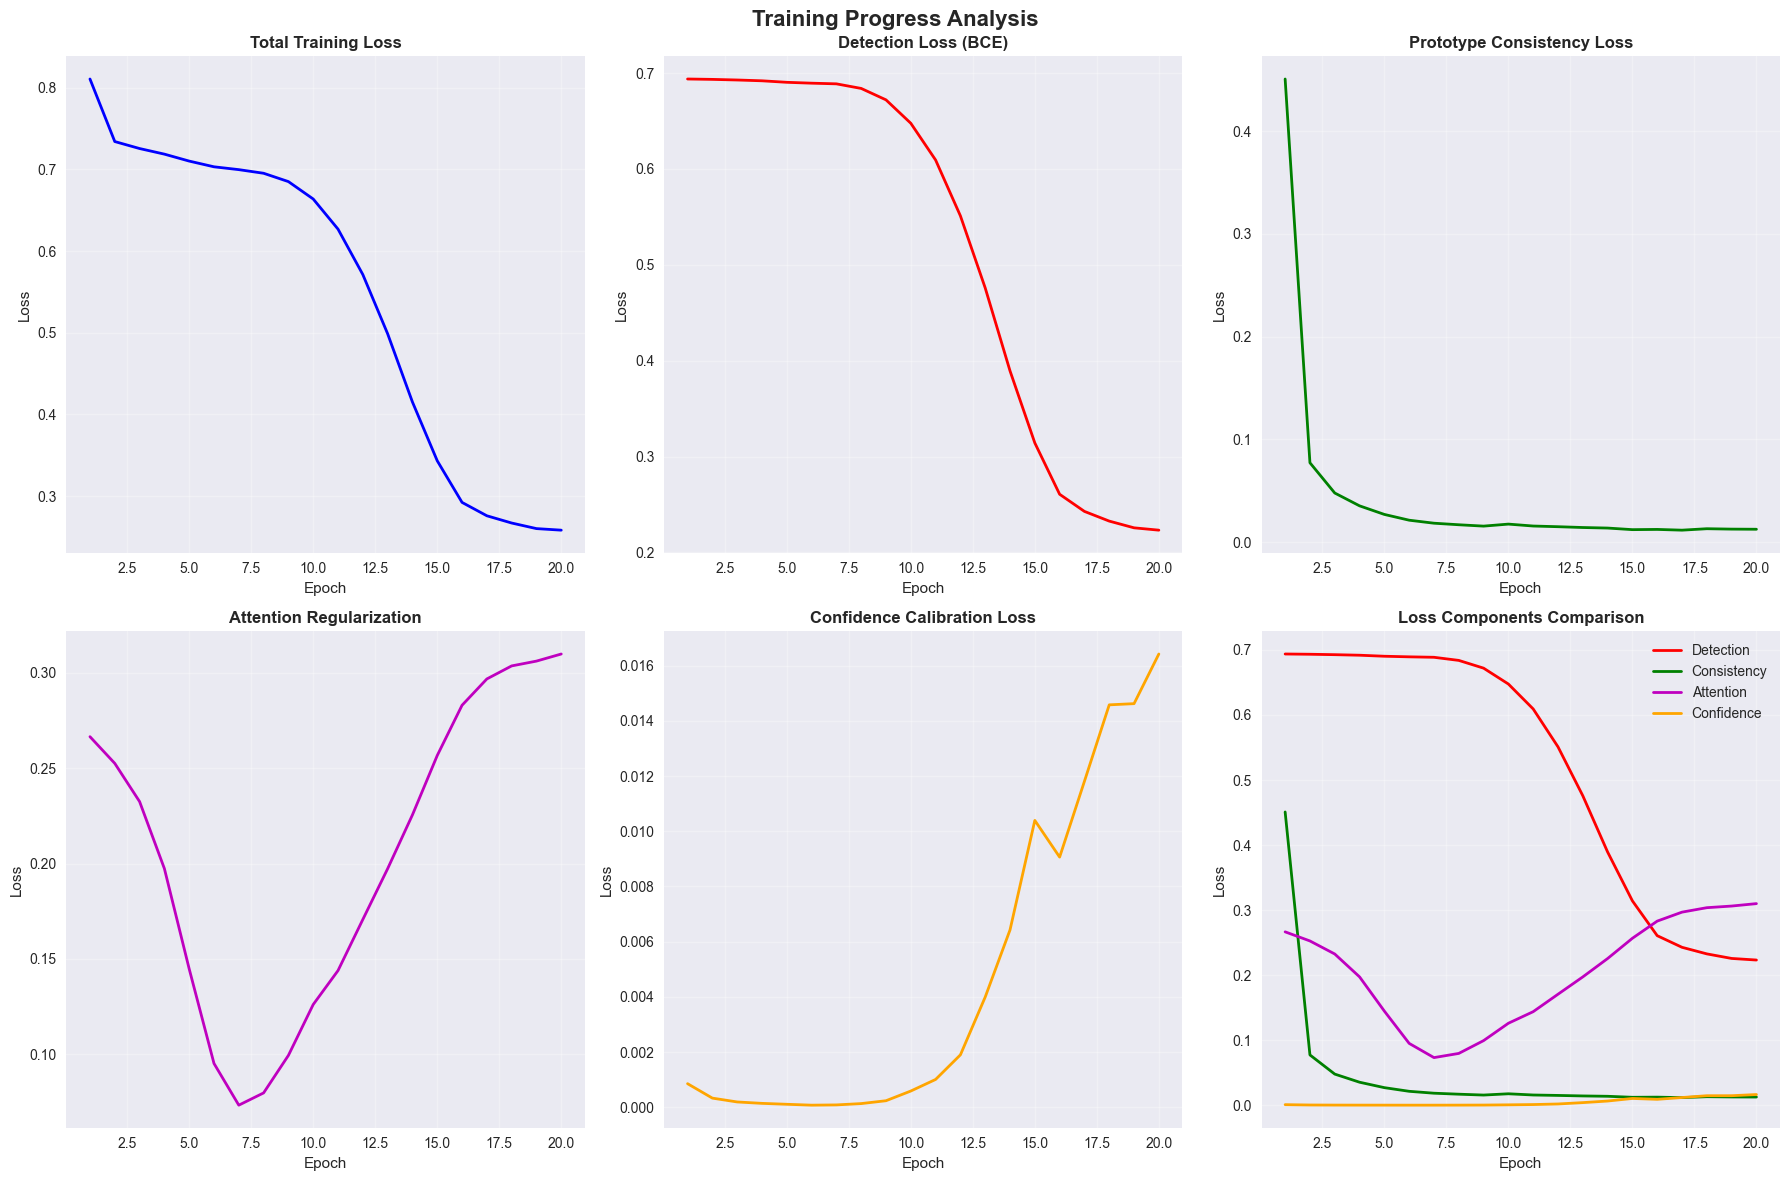

✅ Model saved as 'efficientnet_wire_detector_comprehensive.pth'
🧪 Comprehensive Testing and Analysis...

📊 COMPREHENSIVE ANALYSIS RESULTS


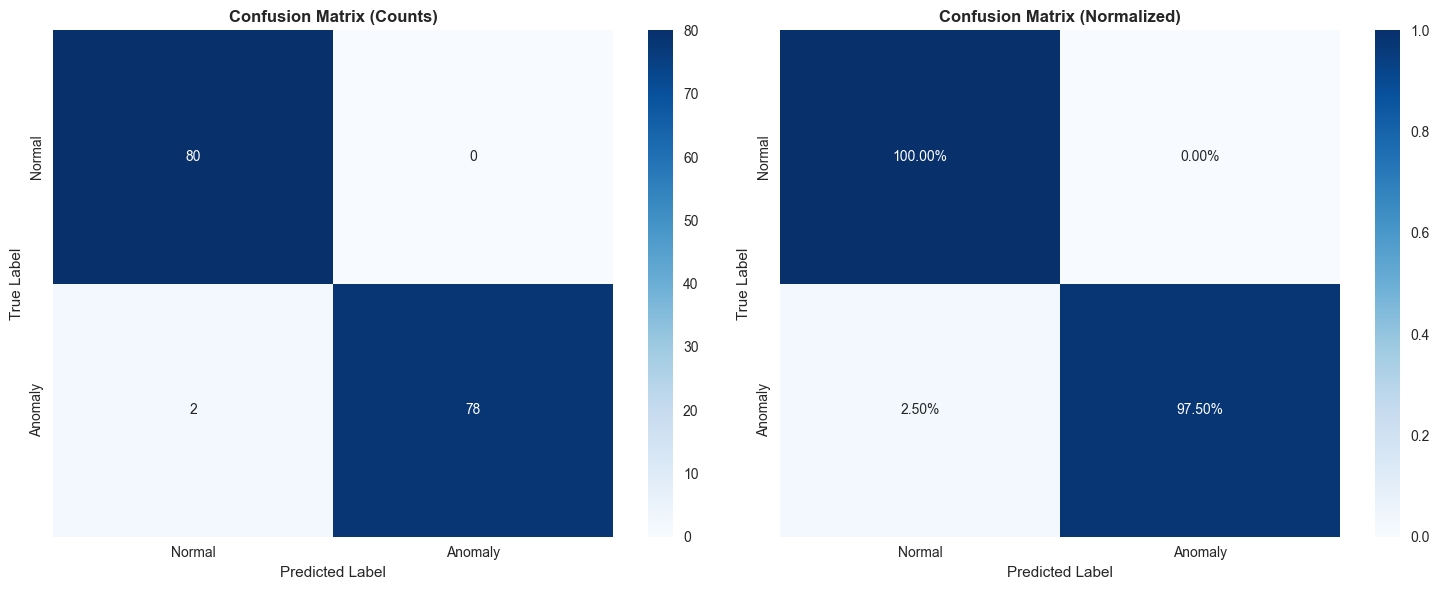


📊 DETAILED CLASSIFICATION METRICS:
              precision    recall  f1-score   support

      Normal     0.9756    1.0000    0.9877        80
     Anomaly     1.0000    0.9750    0.9873        80

    accuracy                         0.9875       160
   macro avg     0.9878    0.9875    0.9875       160
weighted avg     0.9878    0.9875    0.9875       160


🎯 KEY PERFORMANCE INDICATORS:
   True Positives (TP):  78
   True Negatives (TN):  80
   False Positives (FP): 0
   False Negatives (FN): 2
   Sensitivity (Recall): 0.9750
   Specificity:          1.0000


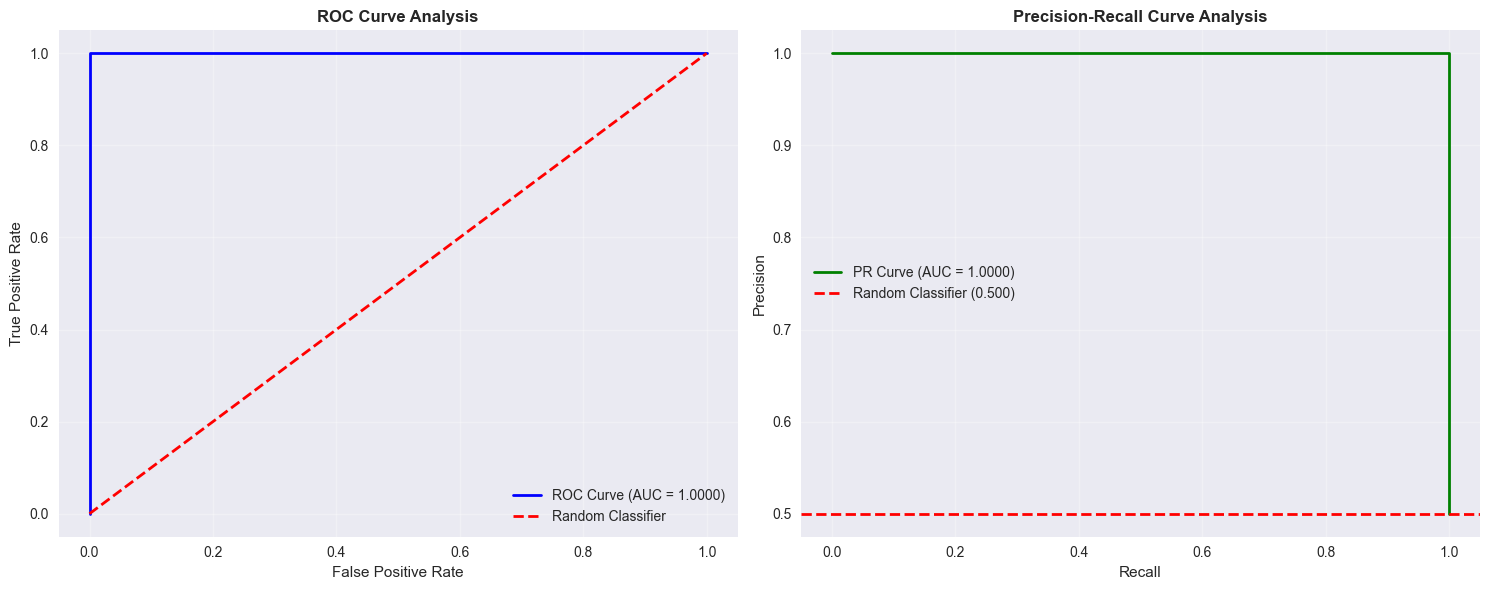


📈 CURVE ANALYSIS:
   ROC AUC Score: 1.0000
   PR AUC Score:  1.0000
   Optimal Threshold: 0.4092
   At Optimal Threshold:
     - True Positive Rate:  1.0000
     - False Positive Rate: 0.0000
🔍 Performing TSNE analysis of feature space...


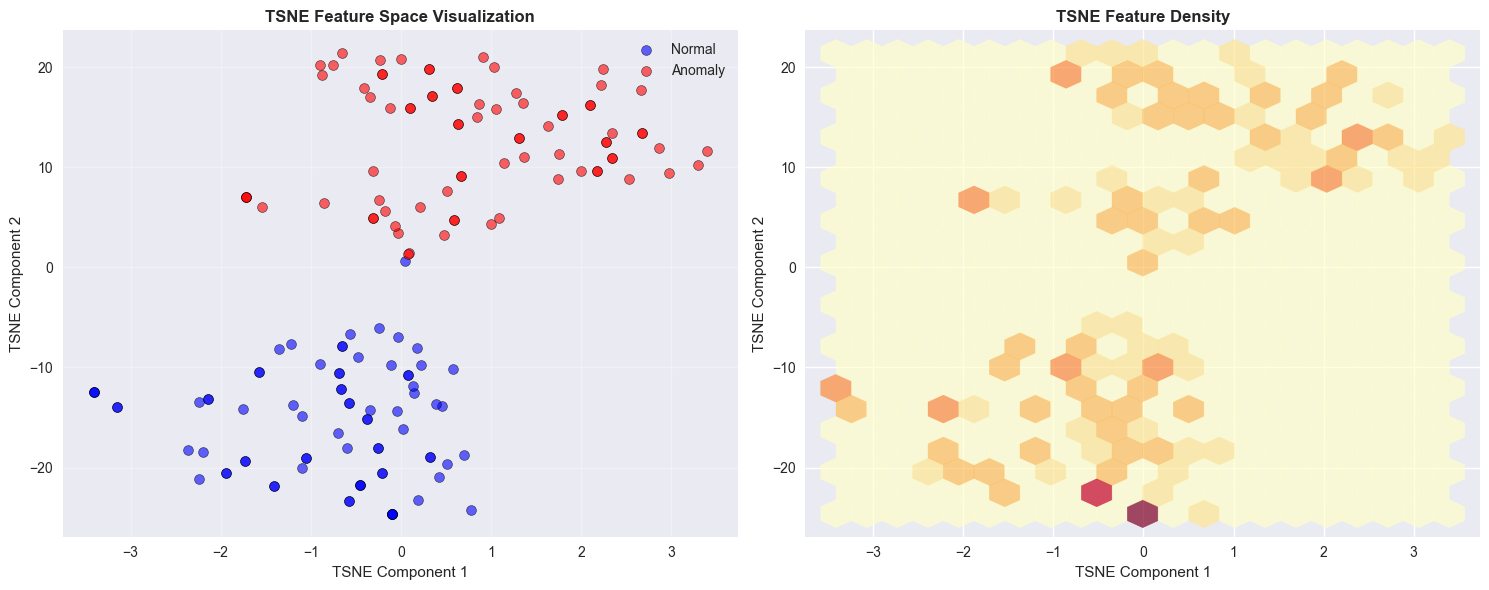

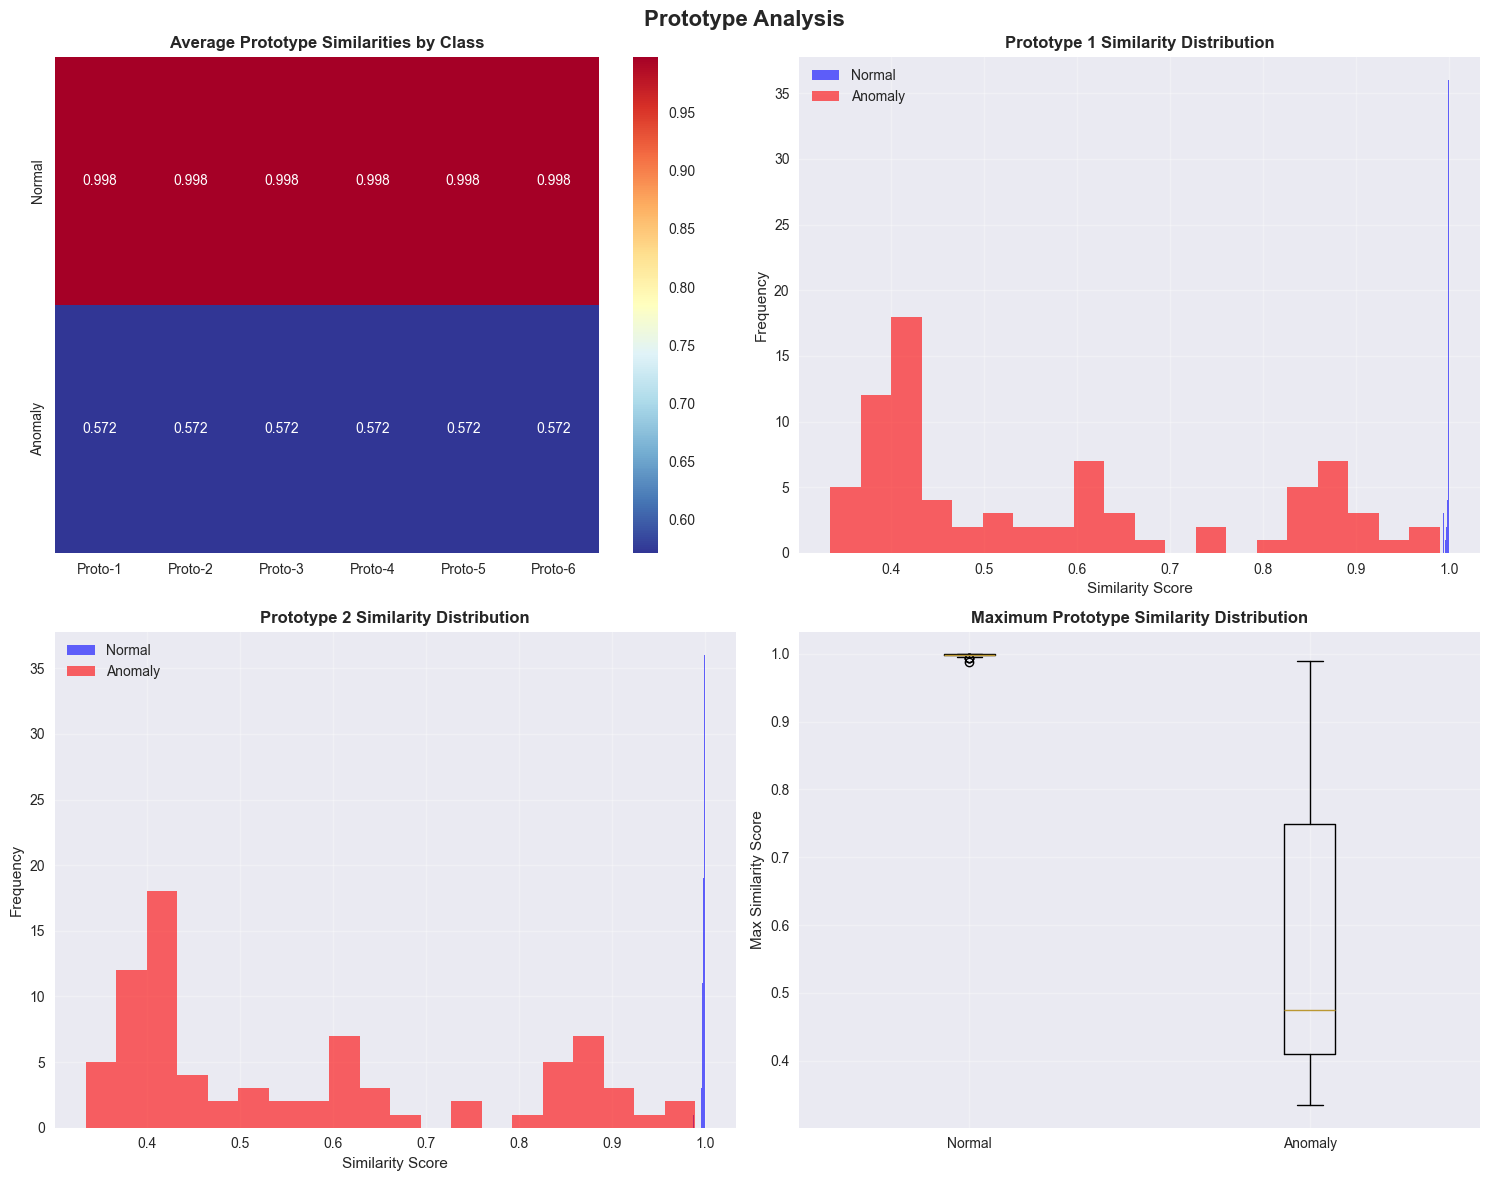


🧠 PROTOTYPE EFFECTIVENESS ANALYSIS:
   Normal samples - Avg max similarity: 0.9982
   Anomaly samples - Avg max similarity: 0.5715
   Separation ratio: 1.75


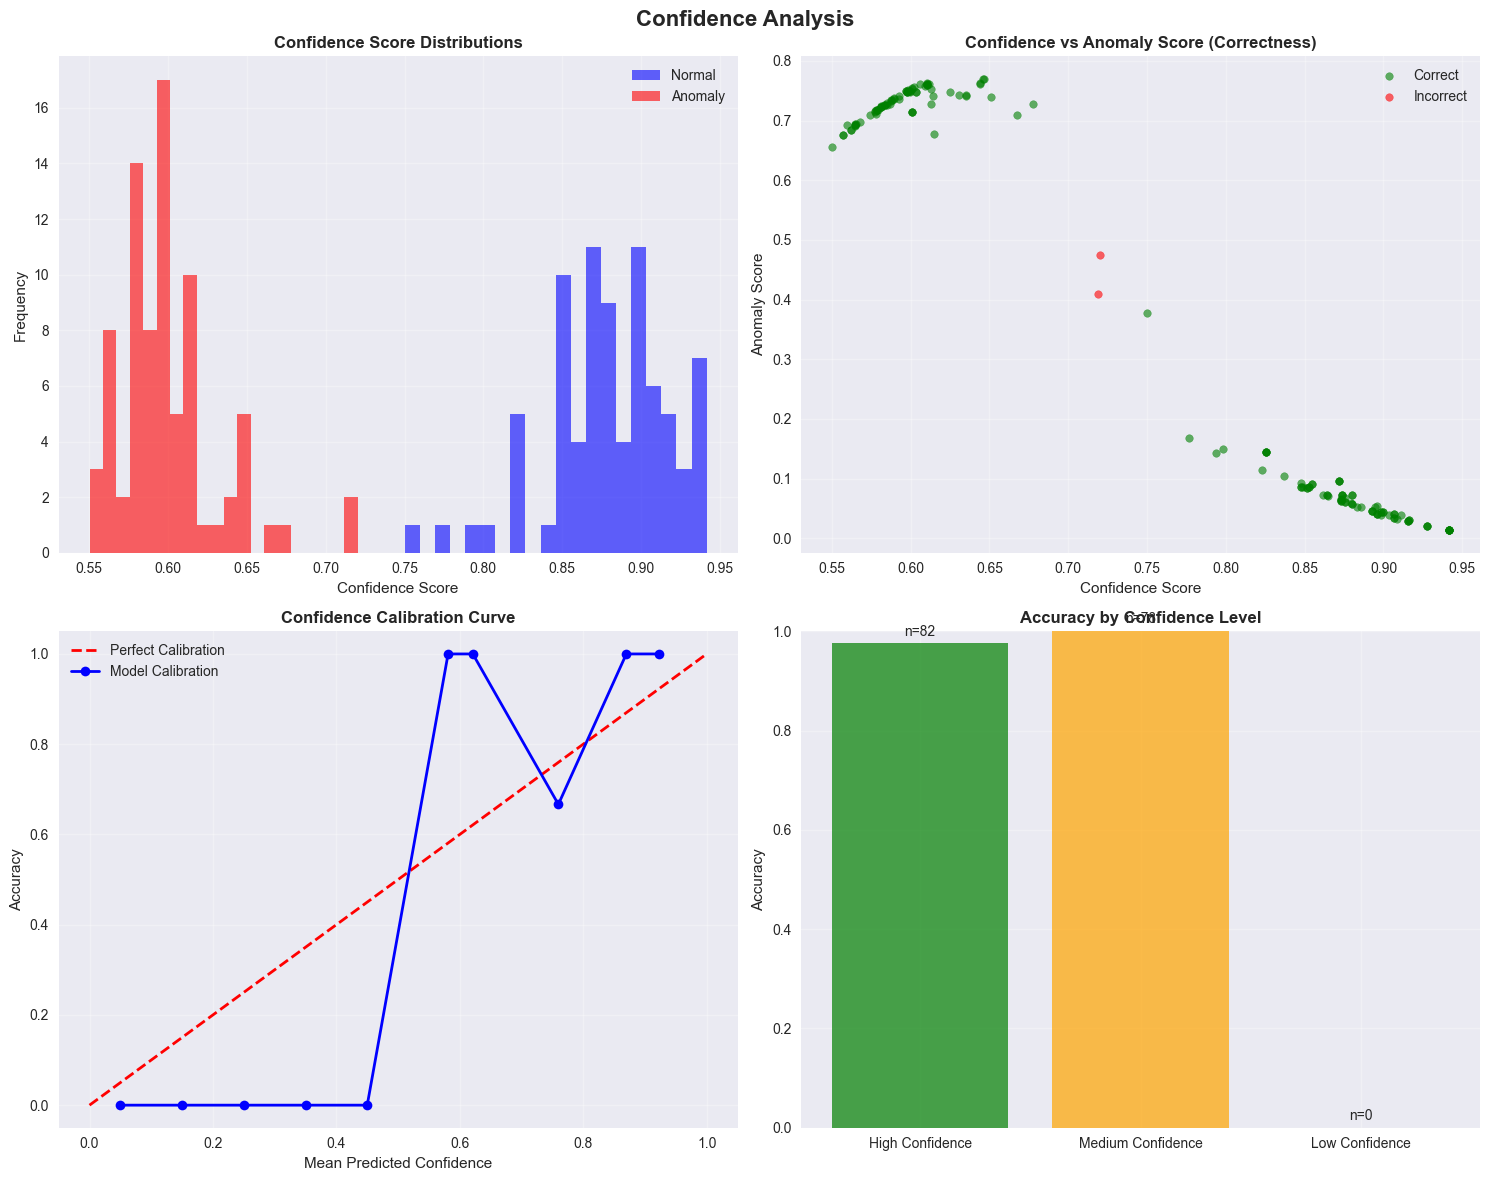


📊 CONFIDENCE ANALYSIS SUMMARY:
   Average confidence (correct): 0.7403
   Average confidence (incorrect): 0.7198
   High confidence samples: 82 (51.2%)
   High confidence accuracy: 0.9756

🎯 FINAL PERFORMANCE SUMMARY:
   Overall Accuracy: 98.75%
   ROC AUC: 1.0000
   PR AUC: 1.0000
   Optimal Threshold: 0.4092

🎉 Comprehensive Analysis Complete!
📁 All plots saved in: ./analysis_plots


In [4]:
import os
import glob
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from typing import Dict, List, Tuple
import random
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.manifold import TSNE
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Check for EfficientNet
try:
    from efficientnet_pytorch import EfficientNet
    EFFICIENTNET_AVAILABLE = True
    print("✅ EfficientNet available")
except ImportError:
    EFFICIENTNET_AVAILABLE = False
    print("❌ EfficientNet not found. Install with: pip install efficientnet_pytorch")
    import torchvision.models as models

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Set up matplotlib for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ===== ENHANCED DATASET CLASS =====
class WireInspectionDataset(Dataset):
    """Enhanced dataset for wire inspection with EfficientNet compatibility"""
    
    def __init__(self, train_dir=None, test_dirs=None, mode='train', transform=None):
        self.images, self.labels = [], []
        self.transform = transform
        self.image_paths = []
        self.mode = mode
        self.class_names = ['Normal', 'Anomaly']

        def load_images(path, label):
            if not os.path.exists(path):
                print(f"Warning: Path {path} does not exist!")
                return
            
            image_files = glob.glob(os.path.join(path, '*.png'))
            print(f"Found {len(image_files)} images in {path}")
            
            self.images.extend(image_files)
            self.labels.extend([label] * len(image_files))
            self.image_paths.extend(image_files)

        if mode == 'train':
            load_images(train_dir, 0)  # Only normal for training
        else:
            for test_dir in test_dirs:
                if 'good' in os.path.basename(test_dir).lower():
                    label = 0  # Normal
                else:
                    label = 1  # Anomaly
                load_images(test_dir, label)

        print(f"{mode.capitalize()} set: {len(self.images)} images loaded")
        if mode == 'test':
            normal_count = sum(1 for l in self.labels if l == 0)
            anomaly_count = sum(1 for l in self.labels if l == 1)
            print(f"Test set breakdown: {normal_count} normal, {anomaly_count} anomaly images")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        try:
            img = cv2.imread(self.images[idx])
            if img is None:
                img = np.zeros((224, 224, 3), dtype=np.uint8)
            
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(img)
            
            if self.transform:
                img = self.transform(img)
            
            return img, self.labels[idx], self.image_paths[idx]
            
        except Exception as e:
            print(f"Error loading image {self.images[idx]}: {e}")
            dummy_img = torch.zeros(3, 224, 224)
            return dummy_img, self.labels[idx], self.image_paths[idx]

# ===== EFFICIENTNET FEW-SHOT MODEL =====
class EfficientNetWireDetector(nn.Module):
    """EfficientNet-based few-shot wire anomaly detector"""
    
    def __init__(self, variant='b0', num_prototypes=8, feature_dim=256):
        super().__init__()
        
        self.num_prototypes = num_prototypes
        self.feature_dim = feature_dim
        
        # EfficientNet backbone or fallback
        if EFFICIENTNET_AVAILABLE:
            self.backbone = EfficientNet.from_pretrained(f'efficientnet-{variant}')
            backbone_features = self.backbone._fc.in_features
            self.backbone._fc = nn.Identity()
        else:
            print("⚠️  Using ResNet50 as EfficientNet fallback")
            self.backbone = models.resnet50(pretrained=True)
            backbone_features = self.backbone.fc.in_features
            self.backbone.fc = nn.Identity()
        
        # Feature adaptation network
        self.feature_adapter = nn.Sequential(
            nn.Linear(backbone_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, feature_dim),
            nn.ReLU()
        )
        
        # Learnable prototypes for normal wire patterns
        self.normal_prototypes = nn.Parameter(
            torch.randn(num_prototypes, feature_dim) * 0.1
        )
        
        # Wire-specific attention mechanism
        self.wire_attention = nn.Sequential(
            nn.Linear(feature_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
        # Prototype similarity calculator
        self.similarity_calculator = nn.Sequential(
            nn.Linear(feature_dim * 2, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Tanh()
        )
        
        # Final anomaly scorer
        self.anomaly_scorer = nn.Sequential(
            nn.Linear(feature_dim + num_prototypes + 1, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
        # Confidence estimator
        self.confidence_estimator = nn.Sequential(
            nn.Linear(feature_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    def extract_features(self, x):
        """Extract features using backbone"""
        if EFFICIENTNET_AVAILABLE:
            features = self.backbone.extract_features(x)
            pooled = F.adaptive_avg_pool2d(features, 1).flatten(1)
        else:
            pooled = self.backbone(x)
        
        adapted = self.feature_adapter(pooled)
        return adapted
    
    def compute_prototype_similarities(self, features):
        """Compute similarities to learned normal prototypes"""
        batch_size = features.size(0)
        similarities = []
        
        for i in range(self.num_prototypes):
            prototype = self.normal_prototypes[i].unsqueeze(0).expand(batch_size, -1)
            sim = F.cosine_similarity(features, prototype, dim=1)
            similarities.append(sim)
        
        return torch.stack(similarities, dim=1)
    
    def few_shot_prototype_update(self, support_features, support_labels):
        """Update prototypes using few-shot support examples"""
        normal_mask = support_labels == 0
        
        if normal_mask.sum() > 0:
            normal_support = support_features[normal_mask]
            alpha = 0.2
            mean_normal = normal_support.mean(dim=0)
            
            for i in range(self.num_prototypes):
                self.normal_prototypes.data[i] = (
                    (1 - alpha) * self.normal_prototypes.data[i] + 
                    alpha * mean_normal
                )
    
    def forward(self, images, support_images=None, support_labels=None):
        """Forward pass with optional few-shot adaptation"""
        
        query_features = self.extract_features(images)
        
        if support_images is not None and support_labels is not None:
            with torch.no_grad():
                support_features = self.extract_features(support_images)
                self.few_shot_prototype_update(support_features, support_labels)
        
        prototype_similarities = self.compute_prototype_similarities(query_features)
        attention_weights = self.wire_attention(query_features)
        attended_features = query_features * attention_weights
        
        combined_features = torch.cat([
            attended_features,
            prototype_similarities,
            attention_weights
        ], dim=1)
        
        anomaly_scores = self.anomaly_scorer(combined_features)
        confidence_scores = self.confidence_estimator(query_features)
        
        if anomaly_scores.dim() > 1:
            anomaly_scores = anomaly_scores.squeeze(-1)
        if confidence_scores.dim() > 1:
            confidence_scores = confidence_scores.squeeze(-1)
        
        return {
            'anomaly_scores': anomaly_scores,
            'confidence_scores': confidence_scores,
            'features': query_features,
            'prototype_similarities': prototype_similarities,
            'attention_weights': attention_weights,
            'attended_features': attended_features
        }

# ===== VISUALIZATION AND ANALYSIS FUNCTIONS =====
class WireDetectionAnalyzer:
    """Comprehensive analysis and visualization for wire detection results"""
    
    def __init__(self, save_dir='./analysis_plots'):
        self.save_dir = save_dir
        os.makedirs(save_dir, exist_ok=True)
        self.training_history = {
            'epoch': [],
            'loss': [],
            'detection_loss': [],
            'consistency_loss': [],
            'attention_reg': [],
            'confidence_loss': []
        }
        
    def log_training_metrics(self, epoch, total_loss, detection_loss, consistency_loss, attention_reg, confidence_loss):
        """Log training metrics for plotting"""
        self.training_history['epoch'].append(epoch)
        self.training_history['loss'].append(total_loss)
        self.training_history['detection_loss'].append(detection_loss)
        self.training_history['consistency_loss'].append(consistency_loss)
        self.training_history['attention_reg'].append(attention_reg)
        self.training_history['confidence_loss'].append(confidence_loss)
    
    def plot_training_curves(self):
        """Plot comprehensive training curves"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Training Progress Analysis', fontsize=16, fontweight='bold')
        
        # Total Loss
        axes[0,0].plot(self.training_history['epoch'], self.training_history['loss'], 'b-', linewidth=2)
        axes[0,0].set_title('Total Training Loss', fontweight='bold')
        axes[0,0].set_xlabel('Epoch')
        axes[0,0].set_ylabel('Loss')
        axes[0,0].grid(True, alpha=0.3)
        
        # Detection Loss
        axes[0,1].plot(self.training_history['epoch'], self.training_history['detection_loss'], 'r-', linewidth=2)
        axes[0,1].set_title('Detection Loss (BCE)', fontweight='bold')
        axes[0,1].set_xlabel('Epoch')
        axes[0,1].set_ylabel('Loss')
        axes[0,1].grid(True, alpha=0.3)
        
        # Consistency Loss
        axes[0,2].plot(self.training_history['epoch'], self.training_history['consistency_loss'], 'g-', linewidth=2)
        axes[0,2].set_title('Prototype Consistency Loss', fontweight='bold')
        axes[0,2].set_xlabel('Epoch')
        axes[0,2].set_ylabel('Loss')
        axes[0,2].grid(True, alpha=0.3)
        
        # Attention Regularization
        axes[1,0].plot(self.training_history['epoch'], self.training_history['attention_reg'], 'm-', linewidth=2)
        axes[1,0].set_title('Attention Regularization', fontweight='bold')
        axes[1,0].set_xlabel('Epoch')
        axes[1,0].set_ylabel('Loss')
        axes[1,0].grid(True, alpha=0.3)
        
        # Confidence Loss
        axes[1,1].plot(self.training_history['epoch'], self.training_history['confidence_loss'], 'orange', linewidth=2)
        axes[1,1].set_title('Confidence Calibration Loss', fontweight='bold')
        axes[1,1].set_xlabel('Epoch')
        axes[1,1].set_ylabel('Loss')
        axes[1,1].grid(True, alpha=0.3)
        
        # Combined Loss Components
        axes[1,2].plot(self.training_history['epoch'], self.training_history['detection_loss'], 'r-', label='Detection', linewidth=2)
        axes[1,2].plot(self.training_history['epoch'], self.training_history['consistency_loss'], 'g-', label='Consistency', linewidth=2)
        axes[1,2].plot(self.training_history['epoch'], self.training_history['attention_reg'], 'm-', label='Attention', linewidth=2)
        axes[1,2].plot(self.training_history['epoch'], self.training_history['confidence_loss'], 'orange', label='Confidence', linewidth=2)
        axes[1,2].set_title('Loss Components Comparison', fontweight='bold')
        axes[1,2].set_xlabel('Epoch')
        axes[1,2].set_ylabel('Loss')
        axes[1,2].legend()
        axes[1,2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/training_curves.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_confusion_matrix(self, y_true, y_pred, class_names=['Normal', 'Anomaly']):
        """Plot confusion matrix with detailed statistics"""
        cm = confusion_matrix(y_true, y_pred)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Raw counts
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=class_names, yticklabels=class_names, ax=axes[0])
        axes[0].set_title('Confusion Matrix (Counts)', fontweight='bold')
        axes[0].set_xlabel('Predicted Label')
        axes[0].set_ylabel('True Label')
        
        # Normalized percentages
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues', 
                   xticklabels=class_names, yticklabels=class_names, ax=axes[1])
        axes[1].set_title('Confusion Matrix (Normalized)', fontweight='bold')
        axes[1].set_xlabel('Predicted Label')
        axes[1].set_ylabel('True Label')
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print detailed metrics
        print("\n📊 DETAILED CLASSIFICATION METRICS:")
        print("=" * 50)
        print(classification_report(y_true, y_pred, target_names=class_names, digits=4))
        
        # Calculate additional metrics
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        print(f"\n🎯 KEY PERFORMANCE INDICATORS:")
        print(f"   True Positives (TP):  {tp}")
        print(f"   True Negatives (TN):  {tn}")
        print(f"   False Positives (FP): {fp}")
        print(f"   False Negatives (FN): {fn}")
        print(f"   Sensitivity (Recall): {sensitivity:.4f}")
        print(f"   Specificity:          {specificity:.4f}")
        
        return cm
    
    def plot_roc_and_pr_curves(self, y_true, y_scores):
        """Plot ROC and Precision-Recall curves"""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # ROC Curve
        fpr, tpr, roc_thresholds = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        
        axes[0].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
        axes[0].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title('ROC Curve Analysis', fontweight='bold')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Precision-Recall Curve
        precision, recall, pr_thresholds = precision_recall_curve(y_true, y_scores)
        pr_auc = auc(recall, precision)
        
        axes[1].plot(recall, precision, 'g-', linewidth=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
        axes[1].axhline(y=np.mean(y_true), color='r', linestyle='--', linewidth=2, 
                       label=f'Random Classifier ({np.mean(y_true):.3f})')
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title('Precision-Recall Curve Analysis', fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/roc_pr_curves.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Find optimal threshold
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = roc_thresholds[optimal_idx]
        
        print(f"\n📈 CURVE ANALYSIS:")
        print(f"   ROC AUC Score: {roc_auc:.4f}")
        print(f"   PR AUC Score:  {pr_auc:.4f}")
        print(f"   Optimal Threshold: {optimal_threshold:.4f}")
        print(f"   At Optimal Threshold:")
        print(f"     - True Positive Rate:  {tpr[optimal_idx]:.4f}")
        print(f"     - False Positive Rate: {fpr[optimal_idx]:.4f}")
        
        return roc_auc, pr_auc, optimal_threshold
    
    def plot_feature_space_analysis(self, features, labels, method='tsne'):
        """Visualize feature space using dimensionality reduction"""
        print(f"🔍 Performing {method.upper()} analysis of feature space...")
        
        if method.lower() == 'tsne':
            reducer = TSNE(n_components=2, random_state=42, perplexity=30)
        else:
            from sklearn.decomposition import PCA
            reducer = PCA(n_components=2, random_state=42)
        
        features_2d = reducer.fit_transform(features)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Scatter plot by class
        normal_mask = labels == 0
        anomaly_mask = labels == 1
        
        axes[0].scatter(features_2d[normal_mask, 0], features_2d[normal_mask, 1], 
                       c='blue', alpha=0.6, s=50, label='Normal', edgecolors='black', linewidth=0.5)
        axes[0].scatter(features_2d[anomaly_mask, 0], features_2d[anomaly_mask, 1], 
                       c='red', alpha=0.6, s=50, label='Anomaly', edgecolors='black', linewidth=0.5)
        axes[0].set_title(f'{method.upper()} Feature Space Visualization', fontweight='bold')
        axes[0].set_xlabel(f'{method.upper()} Component 1')
        axes[0].set_ylabel(f'{method.upper()} Component 2')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Density plot
        axes[1].hexbin(features_2d[:, 0], features_2d[:, 1], gridsize=20, cmap='YlOrRd', alpha=0.7)
        axes[1].set_title(f'{method.upper()} Feature Density', fontweight='bold')
        axes[1].set_xlabel(f'{method.upper()} Component 1')
        axes[1].set_ylabel(f'{method.upper()} Component 2')
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/feature_space_{method}.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_prototype_analysis(self, model, test_features, test_labels):
        """Analyze prototype similarities and effectiveness"""
        with torch.no_grad():
            similarities = model.compute_prototype_similarities(test_features)
            similarities_np = similarities.cpu().numpy()
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Prototype Analysis', fontsize=16, fontweight='bold')
        
        # Prototype similarity heatmap
        normal_mask = test_labels.cpu().numpy() == 0
        anomaly_mask = test_labels.cpu().numpy() == 1
        
        # Average similarities per class
        normal_avg = similarities_np[normal_mask].mean(axis=0) if normal_mask.sum() > 0 else np.zeros(similarities_np.shape[1])
        anomaly_avg = similarities_np[anomaly_mask].mean(axis=0) if anomaly_mask.sum() > 0 else np.zeros(similarities_np.shape[1])
        
        comparison_data = np.vstack([normal_avg, anomaly_avg])
        sns.heatmap(comparison_data, annot=True, fmt='.3f', cmap='RdYlBu_r',
                   xticklabels=[f'Proto-{i+1}' for i in range(similarities_np.shape[1])],
                   yticklabels=['Normal', 'Anomaly'], ax=axes[0,0])
        axes[0,0].set_title('Average Prototype Similarities by Class', fontweight='bold')
        
        # Similarity distributions
        for i in range(min(4, similarities_np.shape[1])):
            if i < 2:
                ax = axes[0, 1] if i == 0 else axes[1, 0]
                ax.hist(similarities_np[normal_mask, i], bins=20, alpha=0.6, label='Normal', color='blue')
                ax.hist(similarities_np[anomaly_mask, i], bins=20, alpha=0.6, label='Anomaly', color='red')
                ax.set_title(f'Prototype {i+1} Similarity Distribution', fontweight='bold')
                ax.set_xlabel('Similarity Score')
                ax.set_ylabel('Frequency')
                ax.legend()
                ax.grid(True, alpha=0.3)
        
        # Max similarity per sample
        max_similarities = similarities_np.max(axis=1)
        axes[1,1].boxplot([max_similarities[normal_mask], max_similarities[anomaly_mask]], 
                         labels=['Normal', 'Anomaly'])
        axes[1,1].set_title('Maximum Prototype Similarity Distribution', fontweight='bold')
        axes[1,1].set_ylabel('Max Similarity Score')
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/prototype_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print prototype effectiveness metrics
        print(f"\n🧠 PROTOTYPE EFFECTIVENESS ANALYSIS:")
        print(f"   Normal samples - Avg max similarity: {max_similarities[normal_mask].mean():.4f}")
        print(f"   Anomaly samples - Avg max similarity: {max_similarities[anomaly_mask].mean():.4f}")
        print(f"   Separation ratio: {max_similarities[normal_mask].mean() / (max_similarities[anomaly_mask].mean() + 1e-8):.2f}")
    
    def plot_confidence_analysis(self, confidence_scores, anomaly_scores, labels):
        """Analyze confidence score distributions and calibration"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Confidence Analysis', fontsize=16, fontweight='bold')
        
        normal_mask = labels == 0
        anomaly_mask = labels == 1
        
        # Confidence distributions by class
        axes[0,0].hist(confidence_scores[normal_mask], bins=20, alpha=0.6, label='Normal', color='blue')
        axes[0,0].hist(confidence_scores[anomaly_mask], bins=20, alpha=0.6, label='Anomaly', color='red')
        axes[0,0].set_title('Confidence Score Distributions', fontweight='bold')
        axes[0,0].set_xlabel('Confidence Score')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # Confidence vs Accuracy scatter
        predictions = (anomaly_scores > 0.5).astype(int)
        correct = (predictions == labels).astype(int)
        
        axes[0,1].scatter(confidence_scores[correct == 1], anomaly_scores[correct == 1], 
                         alpha=0.6, c='green', label='Correct', s=30)
        axes[0,1].scatter(confidence_scores[correct == 0], anomaly_scores[correct == 0], 
                         alpha=0.6, c='red', label='Incorrect', s=30)
        axes[0,1].set_title('Confidence vs Anomaly Score (Correctness)', fontweight='bold')
        axes[0,1].set_xlabel('Confidence Score')
        axes[0,1].set_ylabel('Anomaly Score')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # Confidence calibration
        bins = np.linspace(0, 1, 11)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        bin_accuracies = []
        bin_confidences = []
        
        for i in range(len(bins) - 1):
            mask = (confidence_scores >= bins[i]) & (confidence_scores < bins[i+1])
            if mask.sum() > 0:
                bin_acc = correct[mask].mean()
                bin_conf = confidence_scores[mask].mean()
                bin_accuracies.append(bin_acc)
                bin_confidences.append(bin_conf)
            else:
                bin_accuracies.append(0)
                bin_confidences.append(bin_centers[i])
        
        axes[1,0].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect Calibration')
        axes[1,0].plot(bin_confidences, bin_accuracies, 'bo-', linewidth=2, label='Model Calibration')
        axes[1,0].set_title('Confidence Calibration Curve', fontweight='bold')
        axes[1,0].set_xlabel('Mean Predicted Confidence')
        axes[1,0].set_ylabel('Accuracy')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # High/Low confidence analysis
        high_conf_mask = confidence_scores > 0.7
        low_conf_mask = confidence_scores < 0.3
        
        performance_data = {
            'High Confidence': [correct[high_conf_mask].mean() if high_conf_mask.sum() > 0 else 0, high_conf_mask.sum()],
            'Medium Confidence': [correct[(~high_conf_mask) & (~low_conf_mask)].mean() if ((~high_conf_mask) & (~low_conf_mask)).sum() > 0 else 0, ((~high_conf_mask) & (~low_conf_mask)).sum()],
            'Low Confidence': [correct[low_conf_mask].mean() if low_conf_mask.sum() > 0 else 0, low_conf_mask.sum()]
        }
        
        categories = list(performance_data.keys())
        accuracies = [performance_data[cat][0] for cat in categories]
        counts = [performance_data[cat][1] for cat in categories]
        
        bars = axes[1,1].bar(categories, accuracies, color=['green', 'orange', 'red'], alpha=0.7)
        axes[1,1].set_title('Accuracy by Confidence Level', fontweight='bold')
        axes[1,1].set_ylabel('Accuracy')
        axes[1,1].set_ylim([0, 1])
        
        # Add count annotations
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                          f'n={count}', ha='center', va='bottom')
        
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{self.save_dir}/confidence_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\n📊 CONFIDENCE ANALYSIS SUMMARY:")
        print(f"   Average confidence (correct): {confidence_scores[correct == 1].mean():.4f}")
        print(f"   Average confidence (incorrect): {confidence_scores[correct == 0].mean():.4f}")
        print(f"   High confidence samples: {high_conf_mask.sum()} ({high_conf_mask.mean()*100:.1f}%)")
        print(f"   High confidence accuracy: {correct[high_conf_mask].mean():.4f}")

# ===== ENHANCED TRAINING FUNCTION =====
def train_efficientnet_detector_with_analysis(model, episodes, dataset, epochs=25, lr=1e-4):
    """Training function with comprehensive analysis tracking"""
    
    analyzer = WireDetectionAnalyzer()
    model = model.to(device)
    
    optimizer = torch.optim.Adam([
        {'params': model.backbone.parameters(), 'lr': lr/10},
        {'params': model.feature_adapter.parameters(), 'lr': lr},
        {'params': model.wire_attention.parameters(), 'lr': lr},
        {'params': model.anomaly_scorer.parameters(), 'lr': lr},
        {'params': model.confidence_estimator.parameters(), 'lr': lr},
        {'params': model.normal_prototypes, 'lr': lr*2}
    ])
    
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    
    print("🚀 Training EfficientNet Wire Detector with Analysis...")
    
    for epoch in range(epochs):
        model.train()
        epoch_losses = {
            'total': [],
            'detection': [],
            'consistency': [],
            'attention': [],
            'confidence': []
        }
        
        random.shuffle(episodes)
        
        for episode_idx, (support_indices, query_indices) in enumerate(episodes):
            try:
                # Load support set
                support_images = []
                support_labels = []
                
                for idx in support_indices:
                    img, label, _ = dataset[idx]
                    support_images.append(img)
                    support_labels.append(label)
                
                if len(support_images) == 0:
                    continue
                
                support_images = torch.stack(support_images).to(device)
                support_labels = torch.tensor(support_labels, dtype=torch.float).to(device)
                
                # Load query set
                query_images = []
                query_labels = []
                
                for idx in query_indices:
                    img, label, _ = dataset[idx]
                    query_images.append(img)
                    query_labels.append(label)
                
                if len(query_images) == 0:
                    continue
                
                query_images = torch.stack(query_images).to(device)
                query_labels = torch.tensor(query_labels, dtype=torch.float).to(device)
                
                # Forward pass
                outputs = model(query_images, support_images, support_labels)
                
                # Compute individual losses
                detection_loss = F.binary_cross_entropy(outputs['anomaly_scores'], query_labels)
                
                normal_mask = query_labels == 0
                if normal_mask.sum() > 0:
                    normal_similarities = outputs['prototype_similarities'][normal_mask]
                    consistency_loss = -torch.log(normal_similarities.max(dim=1)[0] + 1e-8).mean()
                else:
                    consistency_loss = torch.tensor(0.0, device=device)
                
                attention_reg = torch.mean(outputs['attention_weights'] ** 2)
                confidence_targets = 1 - torch.abs(outputs['anomaly_scores'] - query_labels)
                confidence_loss = F.mse_loss(outputs['confidence_scores'], confidence_targets)
                
                total_loss = (detection_loss + 0.2 * consistency_loss + 
                             0.1 * attention_reg + 0.1 * confidence_loss)
                
                # Backward pass
                optimizer.zero_grad()
                total_loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                
                # Log losses
                epoch_losses['total'].append(total_loss.item())
                epoch_losses['detection'].append(detection_loss.item())
                epoch_losses['consistency'].append(consistency_loss.item())
                epoch_losses['attention'].append(attention_reg.item())
                epoch_losses['confidence'].append(confidence_loss.item())
                
            except Exception as e:
                print(f"Error in episode {episode_idx}: {e}")
                continue
        
        scheduler.step()
        
        # Log epoch metrics
        if epoch_losses['total']:
            avg_losses = {k: np.mean(v) for k, v in epoch_losses.items()}
            analyzer.log_training_metrics(
                epoch + 1, 
                avg_losses['total'],
                avg_losses['detection'],
                avg_losses['consistency'],
                avg_losses['attention'],
                avg_losses['confidence']
            )
            
            print(f"Epoch {epoch+1}/{epochs}: Loss={avg_losses['total']:.4f}, "
                  f"Det={avg_losses['detection']:.4f}, Con={avg_losses['consistency']:.4f}")
    
    # Plot training curves
    analyzer.plot_training_curves()
    
    return model, analyzer

# ===== COMPREHENSIVE TESTING FUNCTION =====
def comprehensive_test_analysis(model, episodes, dataset):
    """Comprehensive testing with full analysis suite"""
    
    analyzer = WireDetectionAnalyzer()
    model.eval()
    
    all_predictions = []
    all_labels = []
    all_scores = []
    all_confidence = []
    all_features = []
    
    print("🧪 Comprehensive Testing and Analysis...")
    
    with torch.no_grad():
        for episode_idx, (support_indices, query_indices) in enumerate(episodes):
            try:
                # Load support set
                support_images = []
                support_labels = []
                
                for idx in support_indices:
                    img, label, _ = dataset[idx]
                    support_images.append(img)
                    support_labels.append(label)
                
                support_images = torch.stack(support_images).to(device)
                support_labels = torch.tensor(support_labels, dtype=torch.float).to(device)
                
                # Load query set
                query_images = []
                query_labels = []
                
                for idx in query_indices:
                    img, label, _ = dataset[idx]
                    query_images.append(img)
                    query_labels.append(label)
                
                query_images = torch.stack(query_images).to(device)
                query_labels = torch.tensor(query_labels, dtype=torch.float)
                
                # Forward pass
                outputs = model(query_images, support_images, support_labels)
                
                # Collect results
                scores = outputs['anomaly_scores'].cpu().numpy()
                confidence = outputs['confidence_scores'].cpu().numpy()
                features = outputs['features'].cpu().numpy()
                predictions = (scores > 0.5).astype(int)
                labels = query_labels.numpy()
                
                all_predictions.extend(predictions)
                all_labels.extend(labels)
                all_scores.extend(scores)
                all_confidence.extend(confidence)
                all_features.append(features)
                
            except Exception as e:
                print(f"Error testing episode {episode_idx}: {e}")
                continue
    
    # Convert to numpy arrays
    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)
    all_scores = np.array(all_scores)
    all_confidence = np.array(all_confidence)
    all_features = np.vstack(all_features)
    
    print(f"\n📊 COMPREHENSIVE ANALYSIS RESULTS")
    print("=" * 60)
    
    # 1. Confusion Matrix Analysis
    cm = analyzer.plot_confusion_matrix(all_labels, all_predictions)
    
    # 2. ROC and PR Curve Analysis
    roc_auc, pr_auc, optimal_threshold = analyzer.plot_roc_and_pr_curves(all_labels, all_scores)
    
    # 3. Feature Space Analysis
    analyzer.plot_feature_space_analysis(all_features, all_labels, method='tsne')
    
    # 4. Prototype Analysis
    test_features_tensor = torch.tensor(all_features, dtype=torch.float32).to(device)
    test_labels_tensor = torch.tensor(all_labels, dtype=torch.long).to(device)
    analyzer.plot_prototype_analysis(model, test_features_tensor, test_labels_tensor)
    
    # 5. Confidence Analysis
    analyzer.plot_confidence_analysis(all_confidence, all_scores, all_labels)
    
    # Calculate final metrics
    accuracy = (all_predictions == all_labels).mean()
    
    print(f"\n🎯 FINAL PERFORMANCE SUMMARY:")
    print(f"   Overall Accuracy: {accuracy*100:.2f}%")
    print(f"   ROC AUC: {roc_auc:.4f}")
    print(f"   PR AUC: {pr_auc:.4f}")
    print(f"   Optimal Threshold: {optimal_threshold:.4f}")
    
    return {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'confusion_matrix': cm,
        'predictions': all_predictions,
        'labels': all_labels,
        'scores': all_scores,
        'confidence': all_confidence,
        'features': all_features
    }

# ===== FEW-SHOT EPISODE CREATION =====
def create_efficientnet_episodes(dataset, k_shot=4, q_query=8, num_episodes=20):
    """Create few-shot episodes optimized for wire inspection"""
    episodes = []
    
    normal_indices = [i for i, label in enumerate(dataset.labels) if label == 0]
    anomaly_indices = [i for i, label in enumerate(dataset.labels) if label == 1]
    
    print(f"Creating episodes: {len(normal_indices)} normal, {len(anomaly_indices)} anomaly")
    
    for episode_idx in range(num_episodes):
        try:
            support_normal_count = max(1, k_shot - 1)
            support_anomaly_count = min(1, len(anomaly_indices))
            
            if len(normal_indices) < support_normal_count:
                support_normal_count = len(normal_indices)
            
            support_normal = np.random.choice(normal_indices, support_normal_count, replace=False)
            
            if support_anomaly_count > 0 and len(anomaly_indices) > 0:
                support_anomaly = np.random.choice(anomaly_indices, support_anomaly_count, replace=False)
            else:
                support_anomaly = []
            
            remaining_normal = [i for i in normal_indices if i not in support_normal]
            remaining_anomaly = [i for i in anomaly_indices if i not in support_anomaly]
            
            query_normal_count = min(q_query // 2, len(remaining_normal))
            query_anomaly_count = min(q_query // 2, len(remaining_anomaly))
            
            query_normal = np.random.choice(remaining_normal, query_normal_count, replace=False) if query_normal_count > 0 else []
            query_anomaly = np.random.choice(remaining_anomaly, query_anomaly_count, replace=False) if query_anomaly_count > 0 else []
            
            support_indices = list(support_normal) + list(support_anomaly)
            query_indices = list(query_normal) + list(query_anomaly)
            
            if len(support_indices) >= 1 and len(query_indices) >= 2:
                episodes.append((support_indices, query_indices))
        
        except Exception as e:
            print(f"Error creating episode {episode_idx}: {e}")
            continue
    
    print(f"Successfully created {len(episodes)} episodes")
    return episodes

# ===== MAIN EXECUTION =====
def main_comprehensive_wire_detection():
    """Main function for comprehensive EfficientNet wire detection analysis"""
    
    print("🔧 COMPREHENSIVE EFFICIENTNET WIRE ANOMALY DETECTION")
    print("=" * 70)
    
    # Data paths
    train_dir = 'C:/Users/scmawah/Downloads/Summer_project/engine_wiring/train/good' 
    test_dirs = [
        'C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/blue_hoop',
        'C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/cardboard',
        'C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/good',
        'C:/Users/scmawah/Downloads/Summer_project/engine_wiring/test/multiple'
    ]
    
    # Transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Load datasets
    print("📊 Loading Wire Dataset...")
    train_dataset = WireInspectionDataset(train_dir=train_dir, mode='train', transform=transform)
    test_dataset = WireInspectionDataset(test_dirs=test_dirs, mode='test', transform=transform)
    
    if len(train_dataset) == 0 or len(test_dataset) == 0:
        print("❌ Error: No images found. Please check your data paths.")
        return
    
    # Create episodes
    print("🎯 Creating Few-Shot Episodes...")
    episodes = create_efficientnet_episodes(test_dataset, k_shot=4, q_query=8, num_episodes=20)
    
    if len(episodes) == 0:
        print("❌ Error: No episodes created.")
        return
    
    # Create model
    print("🧠 Creating EfficientNet Model...")
    model = EfficientNetWireDetector(variant='b0', num_prototypes=6, feature_dim=256)
    
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Model size: {trainable_params/1e6:.1f}M trainable / {total_params/1e6:.1f}M total parameters")
    
    # Train with analysis
    print("🚀 Training with Comprehensive Analysis...")
    model, analyzer = train_efficientnet_detector_with_analysis(
        model, episodes, test_dataset, epochs=20, lr=1e-4
    )
    
    # Save model
    model_path = 'efficientnet_wire_detector_comprehensive.pth'
    torch.save(model.state_dict(), model_path)
    print(f"✅ Model saved as '{model_path}'")
    
    # Comprehensive testing and analysis
    results = comprehensive_test_analysis(model, episodes, test_dataset)
    
    print("\n🎉 Comprehensive Analysis Complete!")
    print(f"📁 All plots saved in: {analyzer.save_dir}")
    
    return model, results, analyzer

if __name__ == "__main__":
    model, results, analyzer = main_comprehensive_wire_detection()